# Telecom Churn Case Study

__Business problem overview:__

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


The __business objective__ is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, classification_report
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier


sns.set_style("darkgrid")
sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
teldata = pd.read_csv('telecom_churn_data.csv')

In [3]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
teldata.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
teldata.shape

(99999, 226)

In [5]:
teldata.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

## Step-1 : Data Cleaning

### Handeling Missing Values

In [6]:
missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
missingdata.reset_index(inplace=True)
missingdata.rename(columns={'index':'Feature',0:'Missing%'}, inplace=True)

In [7]:
missingdata.sort_values(by='Missing%', ascending=False)

,Feature,Missing%
189,arpu_3g_6,74.846748
197,night_pck_user_6,74.846748
161,total_rech_data_6,74.846748
193,arpu_2g_6,74.846748
165,max_rech_data_6,74.846748
217,fb_user_6,74.846748
177,av_rech_amt_data_6,74.846748
157,date_of_last_rech_data_6,74.846748
169,count_rech_2g_6,74.846748
173,count_rech_3g_6,74.846748


In [8]:
missingdata[missingdata['Missing%']>0].count()

Feature     166
Missing%    166
dtype: int64

The Columns of recharge("rech") are having missing values, which means the User has not done any recharge thus we need to imput that with zeros

In [9]:
rech_columns = teldata.columns[teldata.columns.str.contains('rech_data|rech_amt')]
rech_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

__The Above columns are:__
 
1. Total recharge amount
2. Total recharge for data
3. Maximum recharge amount
4. Last date of Recharging the data
5. Average recharge amount for data

In [10]:
teldata.loc[:, rech_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [11]:
#Imputing missing values/NaNs with 0s
teldata[rech_columns] = teldata[rech_columns].apply(lambda x: x.fillna(0)) 

In [12]:
missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
missingdata.reset_index(inplace=True)
missingdata.rename(columns={'index':'Feature',0:'Missing%'}, inplace=True)

In [13]:
missingdata[missingdata['Missing%']>0].count()

Feature     150
Missing%    150
dtype: int64

In [14]:
# Dropping columns with missing values > 30% threshold
cols_to_drop = missingdata[missingdata['Missing%'] >=30]
cols_to_drop

,Feature,Missing%
169,count_rech_2g_6,74.846748
170,count_rech_2g_7,74.428744
171,count_rech_2g_8,73.660737
172,count_rech_2g_9,74.077741
173,count_rech_3g_6,74.846748
174,count_rech_3g_7,74.428744
175,count_rech_3g_8,73.660737
176,count_rech_3g_9,74.077741
189,arpu_3g_6,74.846748
190,arpu_3g_7,74.428744


In [15]:
cols_drop = cols_to_drop.Feature.values
cols_drop

array(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'], dtype=object)

In [16]:
teldata.drop(columns= cols_drop, axis=1, inplace=True)

In [17]:
final_missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
final_missingdata.reset_index(inplace=True)
final_missingdata.rename(columns={'index':'Feature',0:'Missing%'}, inplace=True)
final_missingdata.sort_values(by='Missing%', ascending=False)

,Feature,Missing%
36,loc_og_t2m_mou_9,7.745077
88,loc_ic_t2t_mou_9,7.745077
44,loc_og_t2c_mou_9,7.745077
100,loc_ic_mou_9,7.745077
96,loc_ic_t2f_mou_9,7.745077
72,isd_og_mou_9,7.745077
104,std_ic_t2t_mou_9,7.745077
32,loc_og_t2t_mou_9,7.745077
48,loc_og_mou_9,7.745077
92,loc_ic_t2m_mou_9,7.745077


In [18]:
teldata.shape

(99999, 202)

In [19]:
# Dropping unwanted columns
date_cols = ['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
teldata.drop(date_cols, axis=1, inplace=True)

In [20]:
final_missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
final_missingdata.reset_index(inplace=True)
final_missingdata.rename(columns={'index':'Feature',0:'Missing%'}, inplace=True)
final_missingdata.sort_values(by='Missing%', ascending=False)

,Feature,Missing%
67,isd_og_mou_9,7.745077
19,roam_ic_mou_9,7.745077
91,loc_ic_t2f_mou_9,7.745077
47,std_og_t2t_mou_9,7.745077
87,loc_ic_t2m_mou_9,7.745077
27,loc_og_t2t_mou_9,7.745077
83,loc_ic_t2t_mou_9,7.745077
75,og_others_9,7.745077
31,loc_og_t2m_mou_9,7.745077
71,spl_og_mou_9,7.745077


In [21]:
teldata.shape

(99999, 189)

In [22]:
teldata.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72

In [23]:
# Imputing remaining missing values with median values of their respective columns
remaining_missing_Values_cols = final_missingdata[final_missingdata['Missing%']>0].Feature.values
for i in remaining_missing_Values_cols:
    teldata[i] = teldata[i].fillna(teldata[i].median())

In [24]:
teldata.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.

In [25]:
final_missingdata = pd.DataFrame(teldata.isnull().sum()*100/teldata.shape[0])
final_missingdata.reset_index(inplace=True)
final_missingdata.rename(columns={'index':'Feature',0:'Missing%'}, inplace=True)
final_missingdata.sort_values(by='Missing%', ascending=False)

,Feature,Missing%
0,mobile_number,0.0
130,ic_others_8,0.0
121,spl_ic_mou_7,0.0
122,spl_ic_mou_8,0.0
123,spl_ic_mou_9,0.0
124,isd_ic_mou_6,0.0
125,isd_ic_mou_7,0.0
126,isd_ic_mou_8,0.0
127,isd_ic_mou_9,0.0
128,ic_others_6,0.0


In [26]:
teldata.info(verbose=1
        )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 189 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    loc_og_t2o_mou      float64
 2    std_og_t2o_mou      float64
 3    loc_ic_t2o_mou      float64
 4    arpu_6              float64
 5    arpu_7              float64
 6    arpu_8              float64
 7    arpu_9              float64
 8    onnet_mou_6         float64
 9    onnet_mou_7         float64
 10   onnet_mou_8         float64
 11   onnet_mou_9         float64
 12   offnet_mou_6        float64
 13   offnet_mou_7        float64
 14   offnet_mou_8        float64
 15   offnet_mou_9        float64
 16   roam_ic_mou_6       float64
 17   roam_ic_mou_7       float64
 18   roam_ic_mou_8       float64
 19   roam_ic_mou_9       float64
 20   roam_og_mou_6       float64
 21   roam_og_mou_7       float64
 22   roam_og_mou_8       float64
 23   roam_og_mou_9       float64
 24   

In [27]:
teldata.shape

(99999, 189)

### Filter high-value customers

Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [28]:
#calculating total data recharge amount
teldata['total_data_rech_6'] = teldata.total_rech_data_6 * teldata.av_rech_amt_data_6
teldata['total_data_rech_7'] = teldata.total_rech_data_7 * teldata.av_rech_amt_data_7

In [29]:
# adding 'total_data_rech' + 'total_rech_amt'
teldata['amt_data_6'] = teldata.total_data_rech_6 + teldata.total_rech_amt_6
teldata['amt_data_7'] = teldata.total_data_rech_7 + teldata.total_rech_amt_7

In [30]:
# calculating average amount of june and july
teldata['av_amt_data_6_7']=(teldata.amt_data_6 + teldata.amt_data_7)/2

In [31]:
# finding the 70th Percentile of avg recharge amount of june/july('good phase')
high_value = teldata.av_amt_data_6_7.quantile(0.70)
print("The Value of recharge amount at 70th percentile: ", high_value)

The Value of recharge amount at 70th percentile:  478.0


In [32]:
highvaldata = teldata.loc[teldata.av_amt_data_6_7 >= high_value,:]
highvaldata = highvaldata.reset_index(drop=True)
highvaldata.shape

(30001, 194)

In [33]:
#drop features created for arriving at high value customers
highvaldata = highvaldata.drop(columns=['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7',
                                       'av_amt_data_6_7'], axis=1)
highvaldata.shape

(30001, 189)

#### So now we have finally got our customers data of 30k rows who have recharge value of  >= 70th percentile of total customers

### Tagging Churn Customers
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [34]:
# computing incoming and outgoing usage
highvaldata['total_ic_og_mou_9'] = highvaldata.total_ic_mou_9 + highvaldata.total_og_mou_9

#computing 2g & 3g data usage
highvaldata['total_2g_3g_mb_9'] = highvaldata.vol_2g_mb_9 + highvaldata.vol_3g_mb_9

In [35]:
# creating 'churn' variable: Where the customers who have not used any data and calling services in september are said to be churned
highvaldata['churn'] = highvaldata.apply(lambda x: 1 if(x.total_ic_og_mou_9==0 and x.total_2g_3g_mb_9==0) else 0, axis=1)

In [36]:
# drop computed columns
highvaldata.drop(columns=['total_ic_og_mou_9','total_2g_3g_mb_9'], axis=1, inplace=True)

In [37]:
highvaldata.shape

(30001, 190)

#### Outlier Handling: Capping

In [38]:
# Capping the outliers for all numeric columns to cap for >Q1 &<Q3 , where Q1 & Q3 are top & bottom 1%.
numeric_columns = highvaldata.iloc[:,2:].columns
for i in numeric_columns:
    Q1 = highvaldata[i].quantile(0.01)
    Q3= highvaldata[i].quantile(0.99)
    IQR = Q3-Q1
    highvaldata = highvaldata.loc[(highvaldata[i]>= Q1-1.5*IQR) & (highvaldata[i]<=Q3+1.5*IQR)]

In [39]:
highvaldata.shape

(26015, 190)

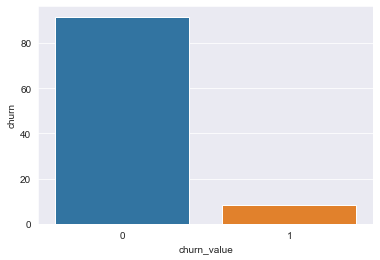

In [40]:
# Inspecting Churn ratio
churn_ratio = pd.DataFrame(highvaldata.churn.value_counts(normalize=True)*100)
churn_ratio['churn_value']=[0,1]
sns.barplot(x=churn_ratio['churn_value'], y=churn_ratio.churn)
plt.show()

In [41]:
churn_ratio

,churn,churn_value
0,91.70863,0
1,8.29137,1


In [42]:
# Dropping columns related to 9th month after tagging churners
sept_columns = highvaldata.columns[highvaldata.columns.str.contains('_9')]
sept_columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [43]:
highvaldata.drop(columns=sept_columns, axis=1, inplace=True)

In [44]:
# dropping sep_vbc_3g column
highvaldata.drop(columns=['sep_vbc_3g'], axis=1, inplace=True)

In [45]:
highvaldata.shape

(26015, 144)

In [46]:
# data type conversions
highvaldata['mobile_number'] = highvaldata['mobile_number'].astype(object)
highvaldata['churn'] = highvaldata['churn'].astype(object)

#### Creating Derived variables

In [47]:
highvaldata.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1
1,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
2,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4

In [48]:
# Derived Variable - 1 : Deriving AON(Age on Network)/365 to get Customer tenurity interms of years.
highvaldata['aon_Years'] = highvaldata['aon'].apply(lambda x : round((x/365),1))

In [49]:
# Derived Variable - 2: Total_loc_MOU(Minutes of Usage) (local_incoming_mou+local_outgoing_mou)
for i in range(6,9):
    highvaldata['Total_loc_mou_'+str(i)] = (highvaldata['loc_ic_mou_'+str(i)])+(highvaldata['loc_og_mou_'+str(i)])

In [50]:
# Derived Variable - 3: Total_roam_MOU(Minutes of USage) ( roaming_incoming_mou+roaming_outgoing_mou)
for i in range(6,9):
    highvaldata['Total_roam_mou_'+str(i)] = (highvaldata['roam_ic_mou_'+str(i)])+(highvaldata['roam_og_mou_'+str(i)])

In [51]:
highvaldata.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,aon_Years,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,2.7,157.27,156.235,5.44,0.00,0.00,0.0
1,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,2.2,850.04,889.140,443.83,39.97,46.08,69.7
2,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.

## Step-2: Exploratory Data Analysis(EDA)

In [52]:
highvaldata.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26015 entries, 0 to 30000
Data columns (total 151 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       object 
 1    loc_og_t2o_mou      float64
 2    std_og_t2o_mou      float64
 3    loc_ic_t2o_mou      float64
 4    arpu_6              float64
 5    arpu_7              float64
 6    arpu_8              float64
 7    onnet_mou_6         float64
 8    onnet_mou_7         float64
 9    onnet_mou_8         float64
 10   offnet_mou_6        float64
 11   offnet_mou_7        float64
 12   offnet_mou_8        float64
 13   roam_ic_mou_6       float64
 14   roam_ic_mou_7       float64
 15   roam_ic_mou_8       float64
 16   roam_og_mou_6       float64
 17   roam_og_mou_7       float64
 18   roam_og_mou_8       float64
 19   loc_og_t2t_mou_6    float64
 20   loc_og_t2t_mou_7    float64
 21   loc_og_t2t_mou_8    float64
 22   loc_og_t2m_mou_6    float64
 23   loc_og_t2m_mou_7    float64
 24   

### Univariate Analysis

In [53]:
def uni(col1, col2, title):
    plt.figure(figsize=[20,10])
    plt.subplot(2,1,1)
    plt.title(title+'\n', fontdict={'size':20})
    sns.distplot(highvaldata[col1])
    plt.subplot(2,1,2)
    sns.distplot(highvaldata[col2])
    plt.tight_layout()
    plt.show()

#### Analysis on the basis of Outgoing Vs Incoming

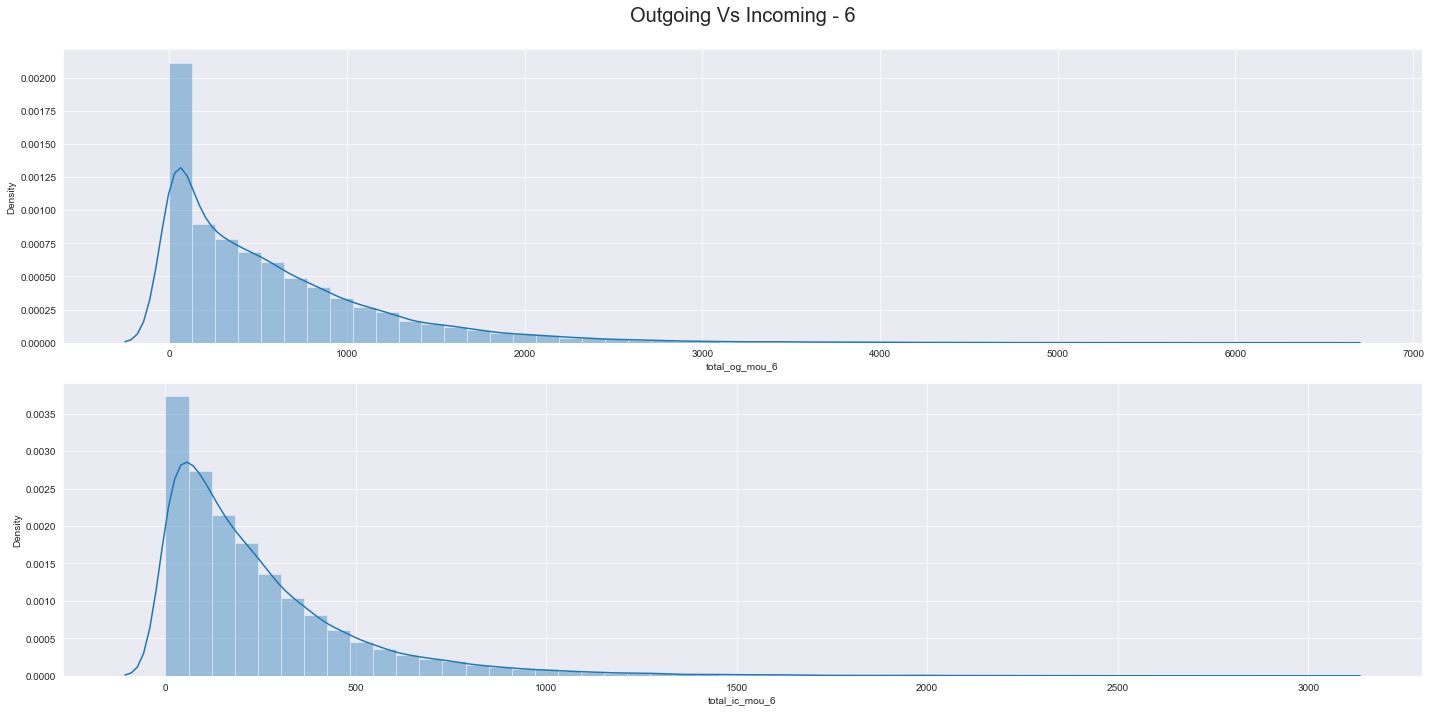

In [54]:
uni('total_og_mou_6','total_ic_mou_6',"Outgoing Vs Incoming - 6")

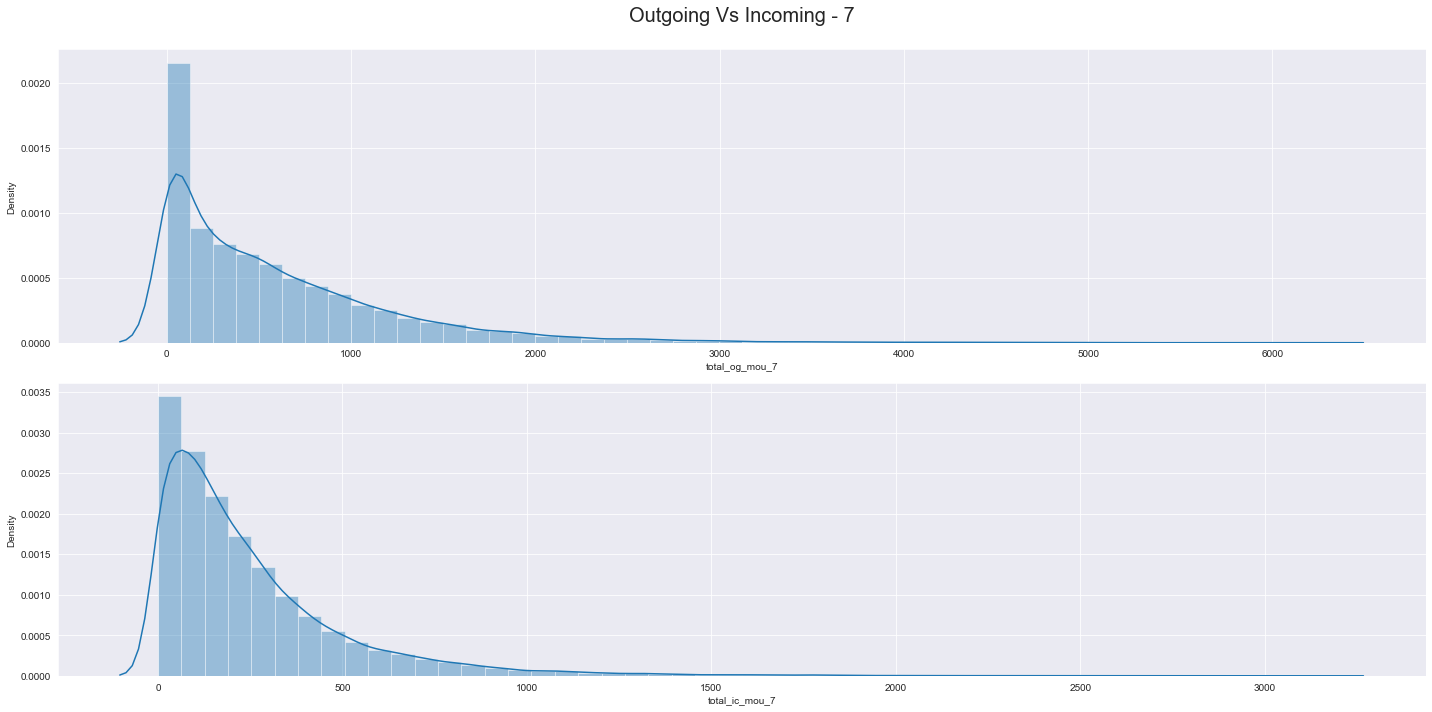

In [55]:
uni('total_og_mou_7','total_ic_mou_7',"Outgoing Vs Incoming - 7")

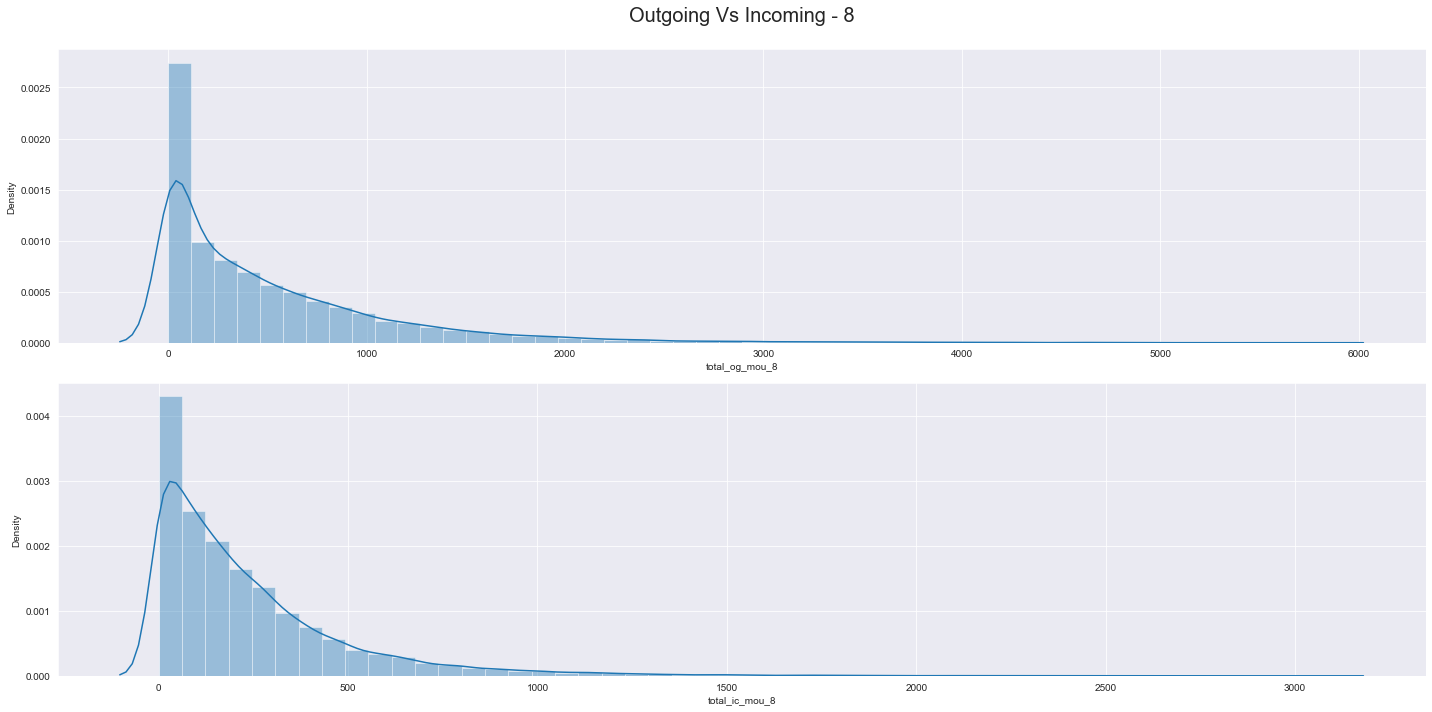

In [56]:
uni('total_og_mou_8','total_ic_mou_8',"Outgoing Vs Incoming - 8")

__Inferences:__ From the above we can infer that outgoing calls are almost twice as incoming calls, we could also see that the data is very much left-skewed

#### Analysis on the basis of Normal Recharge Vs Internet Recharge

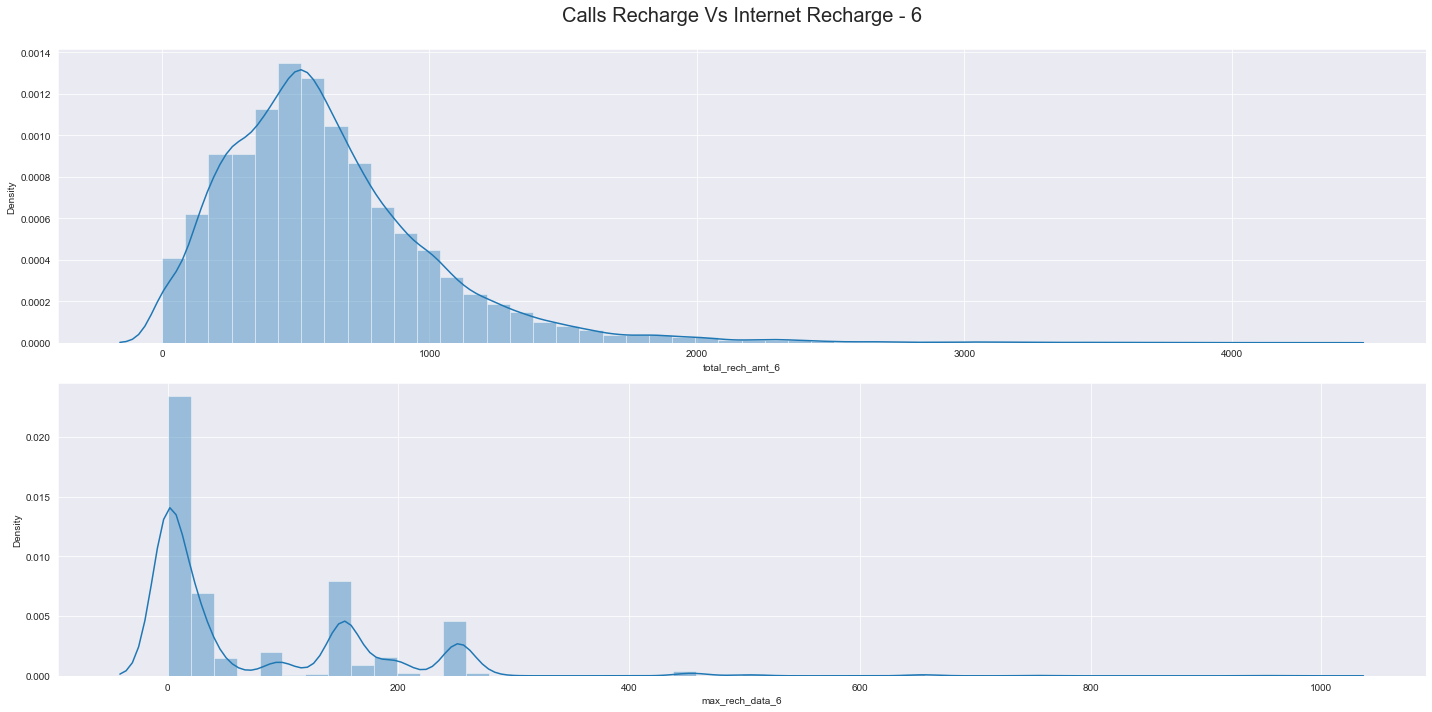

In [57]:
uni('total_rech_amt_6','max_rech_data_6',"Calls Recharge Vs Internet Recharge - 6")

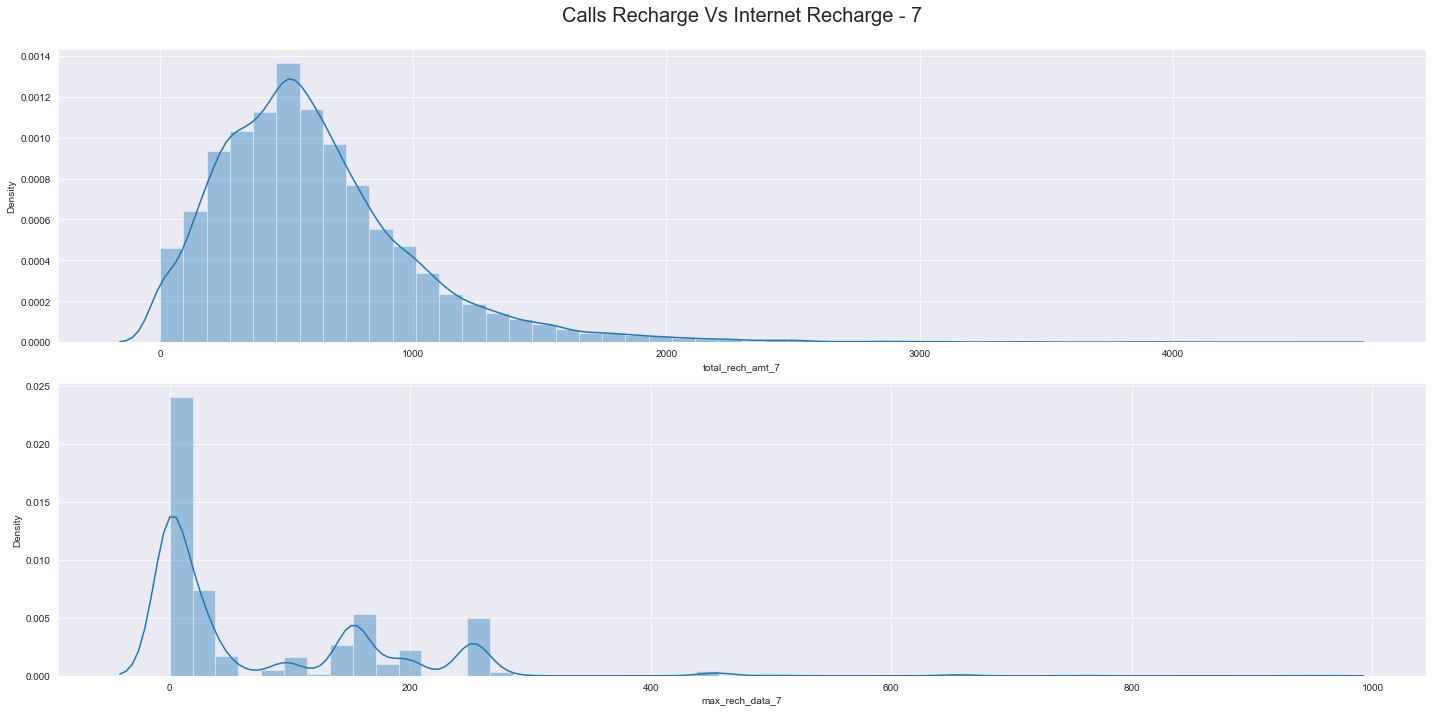

In [58]:
uni('total_rech_amt_7','max_rech_data_7',"Calls Recharge Vs Internet Recharge - 7")

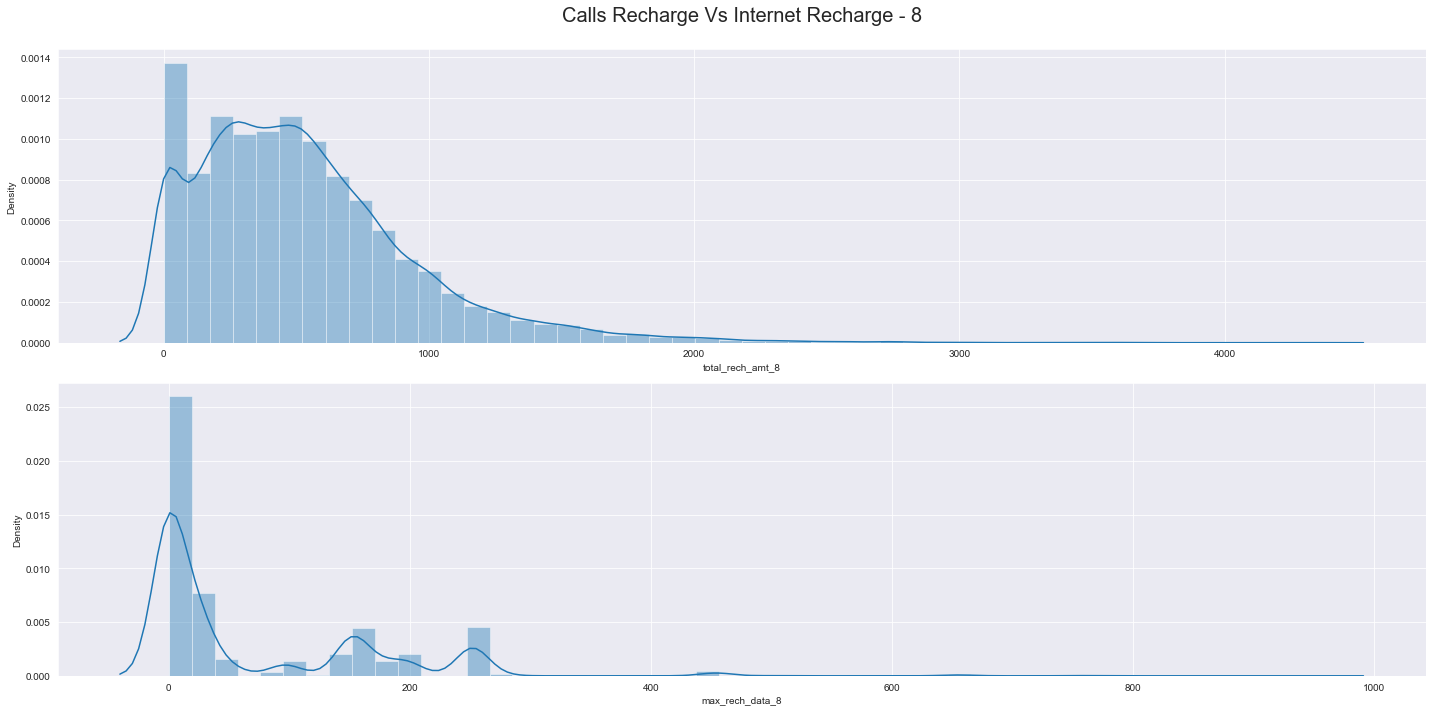

In [59]:
uni('total_rech_amt_8','max_rech_data_8',"Calls Recharge Vs Internet Recharge - 8")

__Inferences:__ From the above we can infer that internet recharges from customers remains almost constant for all the months but, if you zoom into the calls recharge amount they tend to significantly drop/reduce in the 8(August) compared to June & July thus clearly indicating the customer is going to churn. Also the data is highly left-skewed

#### Analysis on the basis of  'Number of times recharge'

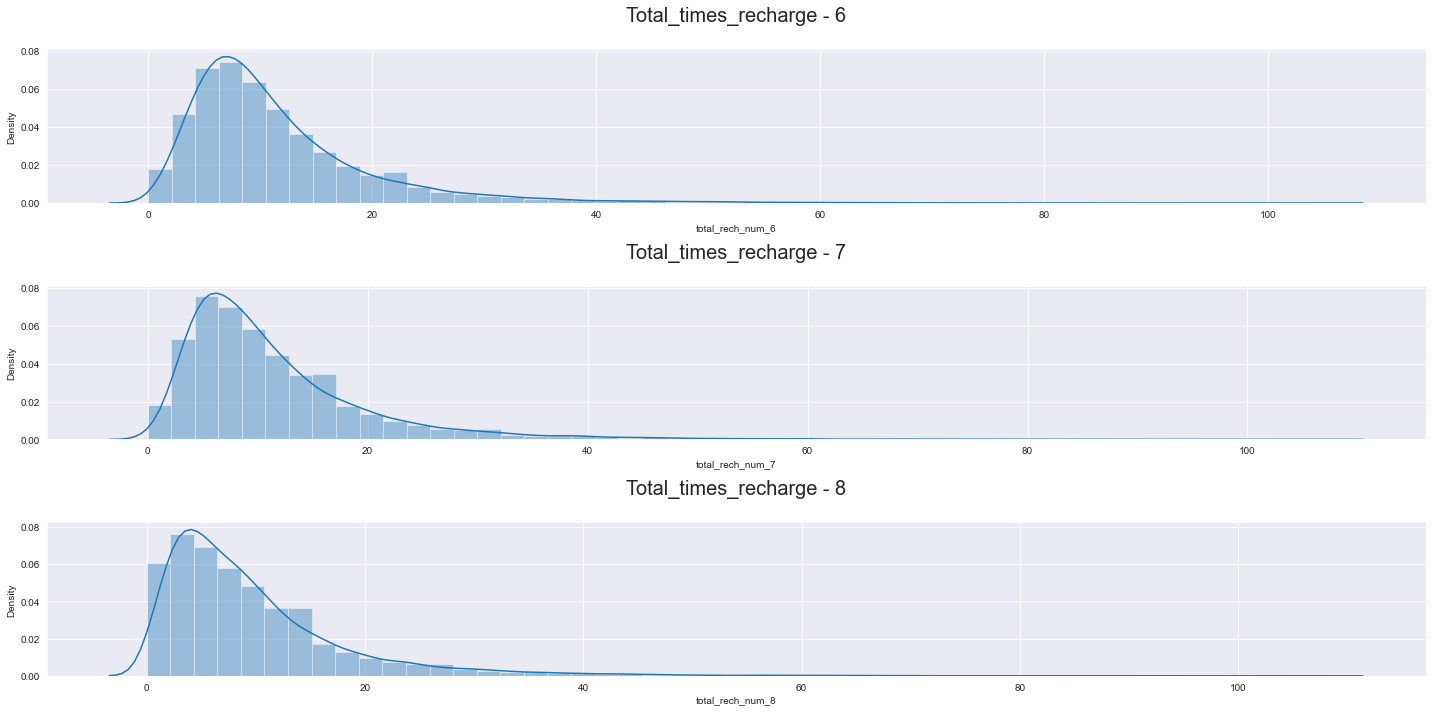

In [60]:
plt.figure(figsize=[20,10])
plt.subplot(3,1,1)
plt.title('Total_times_recharge - 6\n', fontdict={'size':20})
sns.distplot(highvaldata['total_rech_num_6'])
plt.subplot(3,1,2)
plt.title('Total_times_recharge - 7\n', fontdict={'size':20})
sns.distplot(highvaldata['total_rech_num_7'])
plt.subplot(3,1,3)
plt.title('Total_times_recharge - 8\n', fontdict={'size':20})
sns.distplot(highvaldata['total_rech_num_8'])
plt.tight_layout()
plt.show()

__Inferences:__ From the above we can infer that data is highly left-skewed, the volumes of recharge counts spiked in the July(7) month, but if you check the distribution, the August month observed reduction in volumes although density remained as is indicating the possibility of churn happening in upcoming months.

#### Analysis on the basis of 'Average rechare amount'

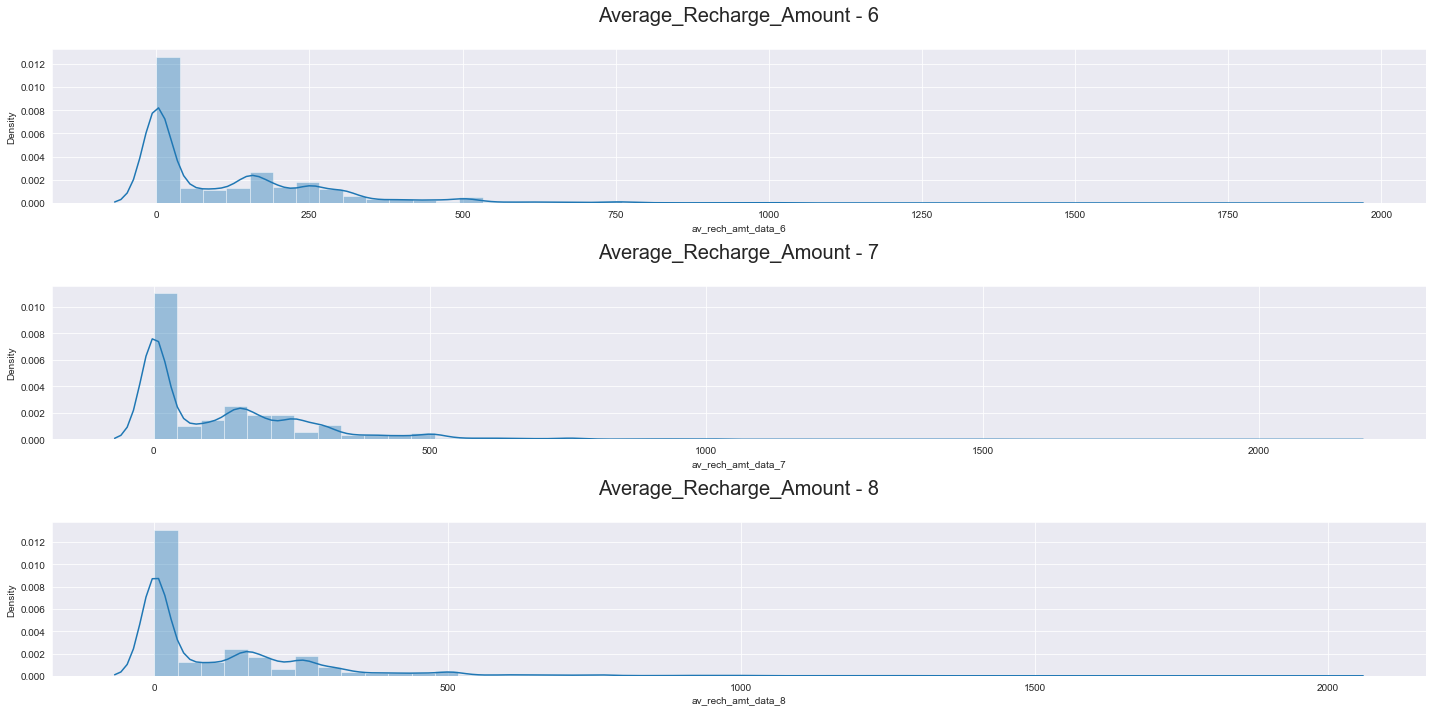

In [61]:
plt.figure(figsize=[20,10])
plt.subplot(3,1,1)
plt.title('Average_Recharge_Amount - 6\n', fontdict={'size':20})
sns.distplot(highvaldata['av_rech_amt_data_6'])
plt.subplot(3,1,2)
plt.title('Average_Recharge_Amount - 7\n', fontdict={'size':20})
sns.distplot(highvaldata['av_rech_amt_data_7'])
plt.subplot(3,1,3)
plt.title('Average_Recharge_Amount - 8\n', fontdict={'size':20})
sns.distplot(highvaldata['av_rech_amt_data_8'])
plt.tight_layout()
plt.show()

__Inference:__ From the above we can see that July(7) had slightly higher average recharge volumes compared to other months, although the density of the volumes tend to decline in the month of August(8) indicating possiblity of churn in upcoming months.

#### Analysing The Tenurity of the customer with Existing Network provider

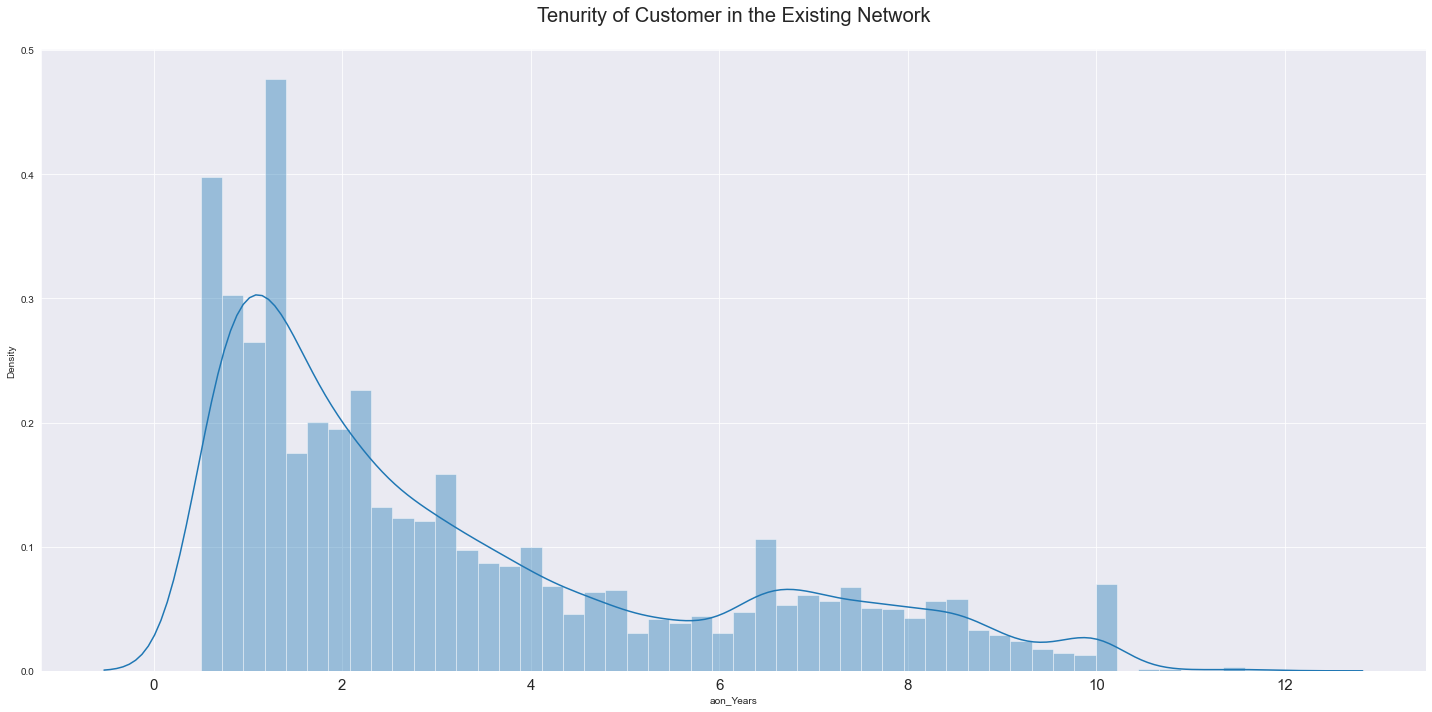

In [62]:
plt.figure(figsize=[20,10])
plt.title('Tenurity of Customer in the Existing Network\n', fontdict={'size':20})
sns.distplot(highvaldata['aon_Years'])
plt.xticks(size=15)
plt.tight_layout()
plt.show()

__Inference__: From the above we can see that majority of the customers are with the existing telecom operator from almost 1 year to 3.5 Years already. Which means the telecom operator has decently stable customers.

### Bivariate Analysis

For Bivariate analysis we will be using all the significant features against the churn feature

In [63]:
def bivariate(colx,col6,col7,col8,title):
    plt.figure(figsize=[12,6])
    
    plt.subplot(1,3,1)
    plt.suptitle(title+'\n', fontsize=20)
    gplot1 = sns.barplot(x=highvaldata[colx], y=highvaldata[col6])
    for p in gplot1.patches:
        gplot1.annotate(round((p.get_height()),2),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=12,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
    
    
    
    
    plt.subplot(1,3,2)
    gplot2 = sns.barplot(x=highvaldata[colx], y=highvaldata[col7])
    for p in gplot2.patches:
        gplot2.annotate(round((p.get_height()),2),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=12,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
    
    
    plt.subplot(1,3,3)
    gplot3 = sns.barplot(x=highvaldata[colx], y=highvaldata[col8])
    for p in gplot3.patches:
        gplot3.annotate(round((p.get_height()),2),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=12,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
    


    
    
    plt.tight_layout()
    plt.show()

#### Analysis on the basis of Incoming Calls

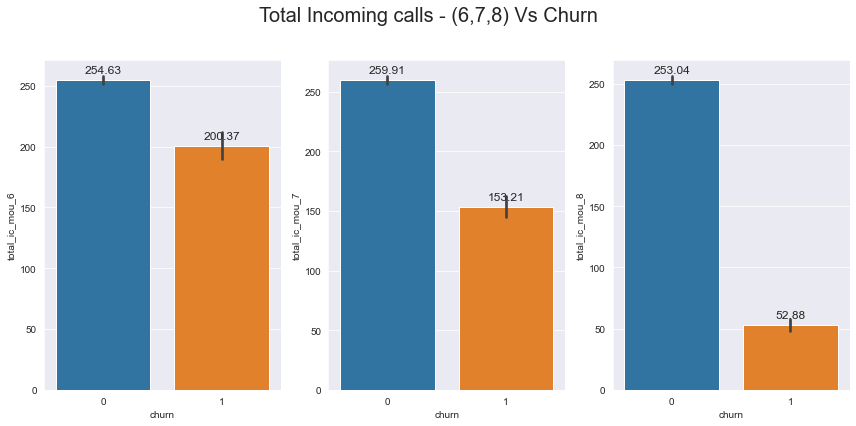

In [64]:
bivariate('churn', 'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','Total Incoming calls - (6,7,8) Vs Churn')

__Inference:__ From the above we can see that over the period of time the incoming calls for churners is reducing significantly, whereas for non-churners, the incoming call volumes are consistent

#### Analysis on the basis of Outgoing Calls

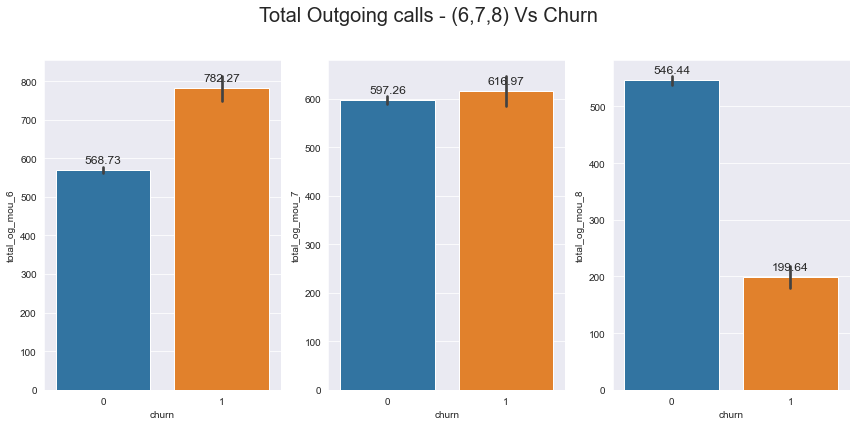

In [65]:
bivariate('churn', 'total_og_mou_6','total_og_mou_7','total_og_mou_8','Total Outgoing calls - (6,7,8) Vs Churn')

__Inference:__ From the above we can see that in August(8) the outgoing calls for churners is dropped significantly, whereas for non-churners, the outgoing call volumes are consistent.

#### Analysis on the basis of Times Recharged 

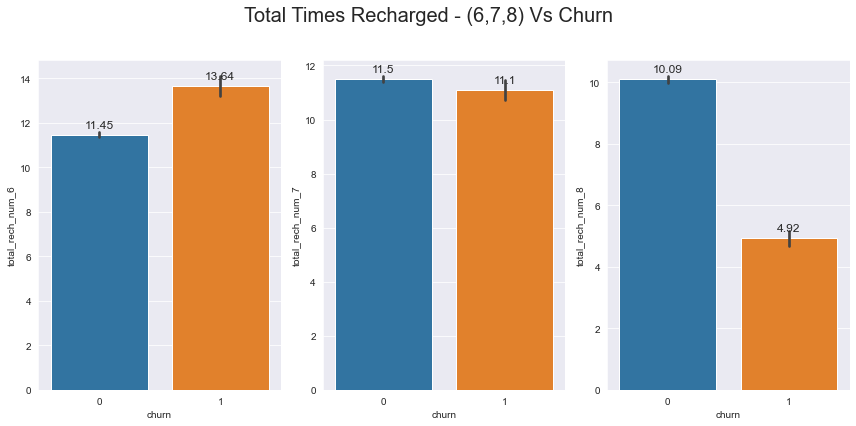

In [66]:
bivariate('churn', 'total_rech_num_6','total_rech_num_7','total_rech_num_8','Total Times Recharged - (6,7,8) Vs Churn')

__Inference:__ Again as expected the total times recharged has dropped significantly by approximately 46% in the month of August(8) compared to months 6 & 7 for churners.

#### Analysis on the basis of Recharge(Calls) Amount

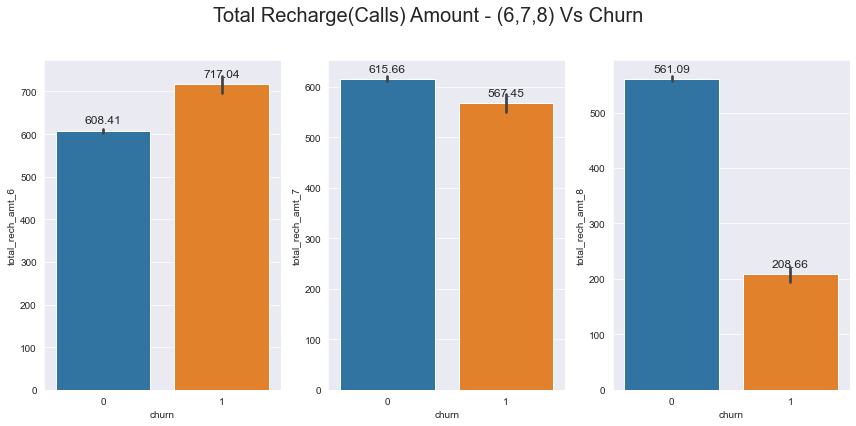

In [67]:
bivariate('churn', 'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','Total Recharge(Calls) Amount - (6,7,8) Vs Churn')

__Inference:__ Again as expected the total recharge amount for calls has dropped significantly by approximately 53% in the month of August(8) compared to months 6 & 7 for churners.

#### Analysis on the basis of Recharge(Internet) Amount

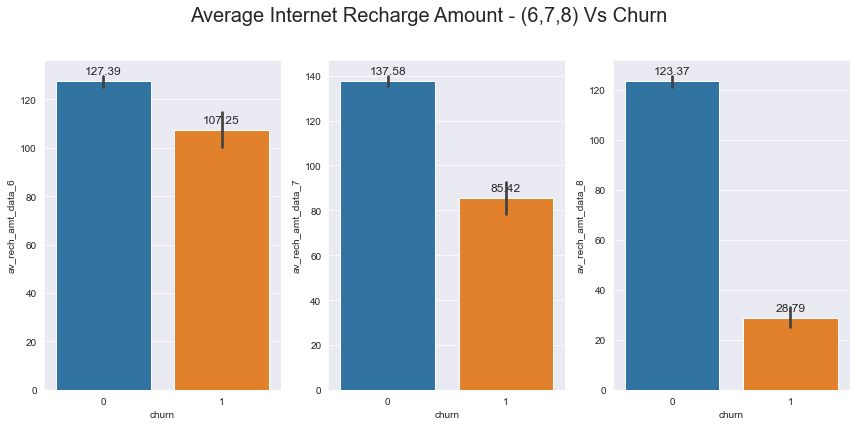

In [68]:
bivariate('churn', 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','Average Internet Recharge Amount - (6,7,8) Vs Churn')

__Inference:__ Simultaneously as expected the average recharge amount for data(internet) has dropped significantly by approximately 62% in the month of August(8) compared to months 6 & 7 for churners.

#### Analysis on the basis of Average Revenue Per User

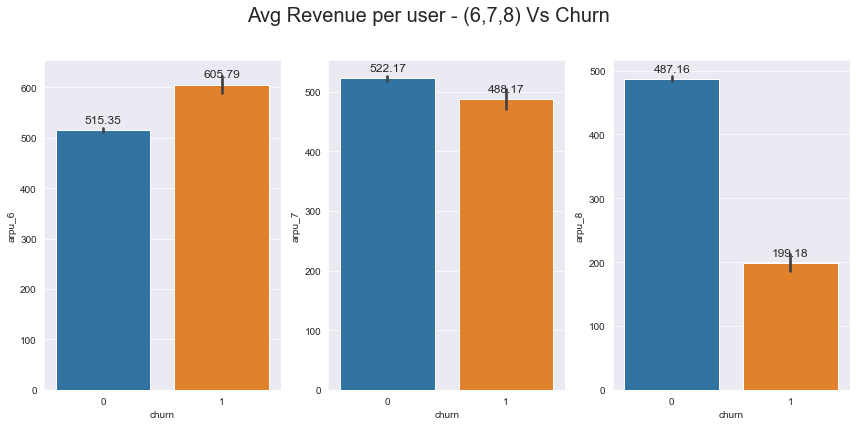

In [69]:
bivariate('churn', 'arpu_6','arpu_7','arpu_8','Avg Revenue per user - (6,7,8) Vs Churn')

__Inference:__ The Avg revenue per user for the churners has dropped by 48% in the month of August(8), Where as for non-churners it has stayed consistent.

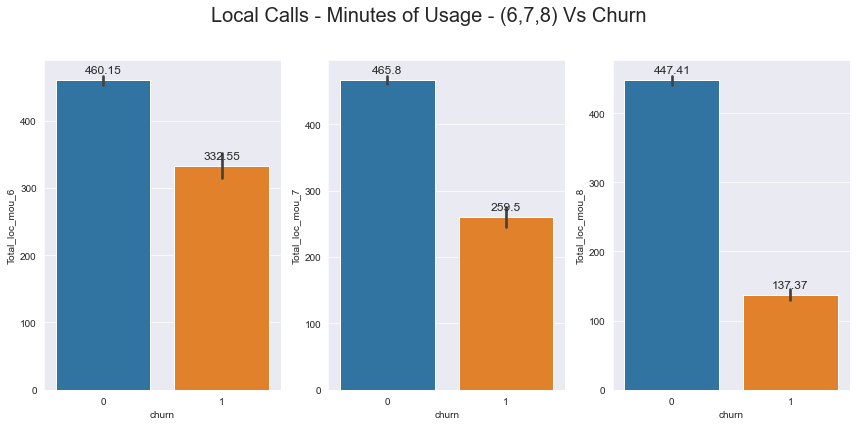

In [70]:
bivariate('churn', 'Total_loc_mou_6','Total_loc_mou_7','Total_loc_mou_8','Local Calls - Minutes of Usage - (6,7,8) Vs Churn')

__Inference:__ The Minutes of usage(local) is consistent for Non-churners but for churners there is a constant decline in the usage over the span of 3 months

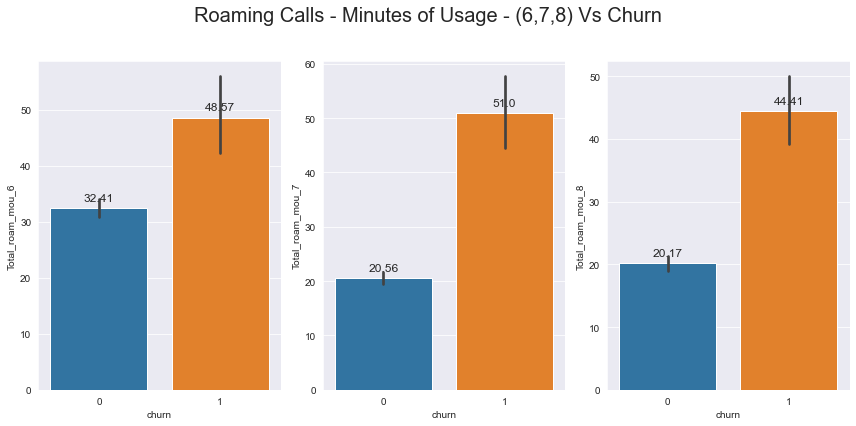

In [71]:
bivariate('churn', 'Total_roam_mou_6','Total_roam_mou_7','Total_roam_mou_8','Roaming Calls - Minutes of Usage - (6,7,8) Vs Churn')

__Inference__: The minutes of usage(roaming) for churners is also declining constantly. Although for non-churners it has dropped almost 50%

#### Analysis on the basis of Customer Tenurity with Network provider

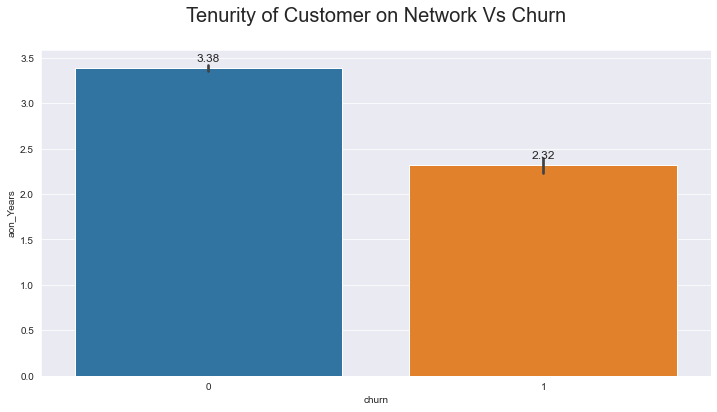

In [72]:
plt.figure(figsize=[12,6])
    
    
plt.title('Tenurity of Customer on Network Vs Churn'+'\n', fontsize=20)
gplot1 = sns.barplot(x=highvaldata['churn'], y=highvaldata['aon_Years'])
for p in gplot1.patches:
        gplot1.annotate(round((p.get_height()),2),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=12,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it

__Inference:__ From the above we can infer that the customers who are churners or likely to leave have been of less tenurity (approx 2.3 Years) with the network provider, whereas non churners are the ones who are with the network provider for longer duration (3.3 Years) compared to churners.

In [73]:
highvaldata.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,aon_Years,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,2.7,157.27,156.235,5.44,0.00,0.00,0.0
1,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,2.2,850.04,889.140,443.83,39.97,46.08,69.7
2,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.180,63.04,116.56,133.43,22.58,13.69,10.040,75.69,0.00,0.

In [74]:
['churn','arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','aon']

['churn',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'aon']

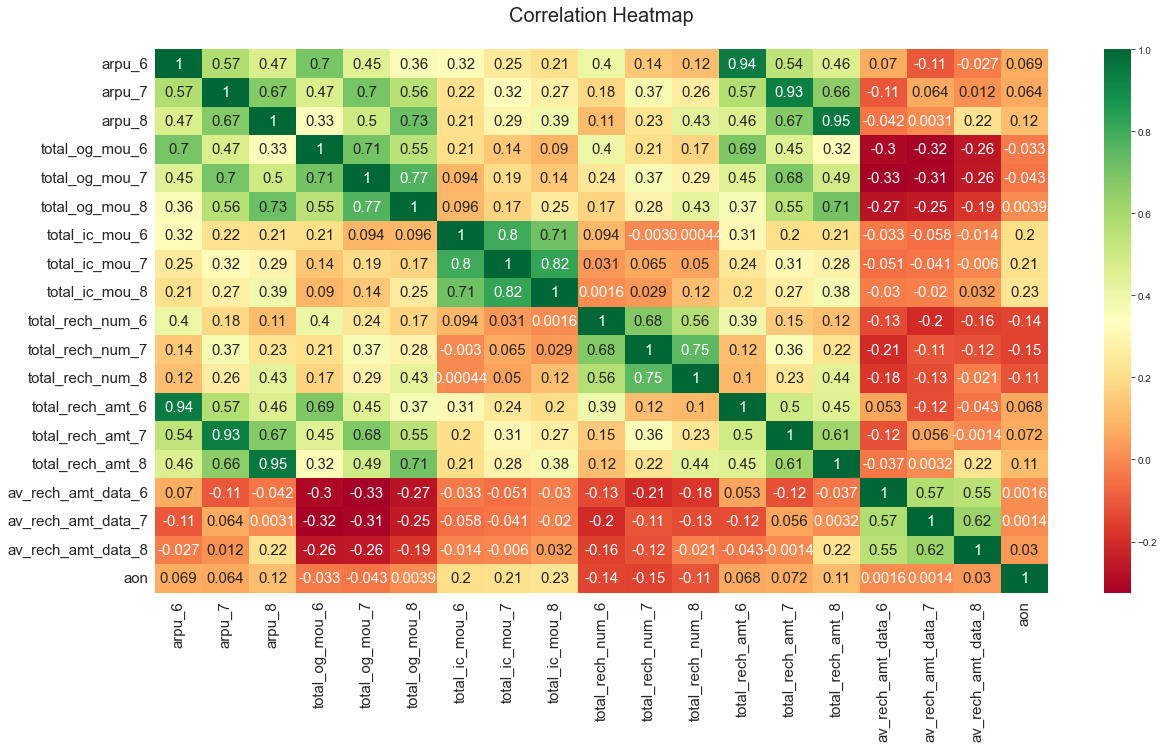

In [75]:
plt.figure(figsize=[20,10])
sns.heatmap(highvaldata[['arpu_6','arpu_7','arpu_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','aon','churn']]
            .corr(method='pearson'),cmap='RdYlGn', annot=True,annot_kws={"size":15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Heatmap\n', fontdict={'fontsize':20})
plt.show()

## Step-3: Data Pre-Processing for Model Building

### Handeling Data Imbalance:

In [76]:
highvaldata.churn.value_counts(normalize=True)*100

0    91.70863
1     8.29137
Name: churn, dtype: float64

In [77]:
X = highvaldata.drop(['churn','mobile_number'], axis=1)

In [78]:
y = highvaldata['churn']
y=y.astype('int')

#### Using SMOTE(Synthetic Minority Oversampling Technic):
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [79]:
smote = SMOTE(random_state=48)

In [80]:
X_smote,y_smote = smote.fit_resample(X,y)

In [81]:
y_smote.value_counts()

1    23858
0    23858
Name: churn, dtype: int64

In [82]:
X_train, X_test, y_train,y_test = train_test_split(X_smote,y_smote,train_size=0.7, test_size=0.3, random_state=100, stratify=y_smote)

In [83]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(33401, 149) (14315, 149) (33401,) (14315,)


In [84]:
round(y_train.value_counts(normalize=True)*100)

1    50.0
0    50.0
Name: churn, dtype: float64

In [85]:
round(y_test.value_counts(normalize=True)*100)

0    50.0
1    50.0
Name: churn, dtype: float64

__As you can see above, Now the data is balanced using SMOTE__

In [86]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,aon_Years,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
29894,0.0,0.0,0.0,570.680214,304.736967,140.334131,48.103497,15.016536,24.159176,252.775659,75.698948,88.472878,0.00,1.431729,0.00,0.00,0.187618,0.00,48.103497,15.016536,24.159176,228.165023,70.867010,88.472878,0.00000,0.00,0.00,3.704843,1.881046,0.00,276.270342,85.891724,112.640232,0.000000,0.000000,0.00,16.963984,0.28416,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,16.963984,0.284160,0.00,3.890805,2.477292,0.0,7.309834,6.689982,0.474351,7.516006,0.0,0.0,311.970972,95.353157,113.122762,56.695614,20.077712,24.028321,182.073004,54.692055,38.206205,0.000000,0.360665,0.00,238.776797,75.140431,62.234526,0.000000,0.00,0.00,11.694908,2.284209,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,11.694908,2.284209,0.00,259.808253,78.765003,62.234526,0.163569,0.5316,0.0,3.781513,0.806941,0.0,5.379643,0.000000,0.0,21,15,2,660,357,165,62,60,124,24,44,0,3.453539,2.453539,0.0,23.542770,20.446155,0.0,78.338464,54.795695,0.0,265.072129,18.368825,0.0,0.000000,0.000000,0.0,0,0,0,3,2,0,0,0,0,0,0,0,334,0.0,0.000000,0.000000,0.891077,515.047139,161.032155,174.874758,0.00,1.619347,0.00
20100,0.0,0.0,0.0,705.192000,269.973000,1.200000,19.810000,14.630000,0.850000,1327.160000,567.210000,0.790000,0.00,0.000000,0.00,0.00,0.000000,0.00,19.810000,14.630000,0.000000,60.710000,62.590000,0.000000,0.00000,0.00,0.00,0.000000,6.180000,0.71,80.530000,77.230000,0.000000,0.000000,0.000000,0.85,1266.440000,496.31000,0.08,0.00,0.000000,0.0,0.0,0.0,0.0,1266.440000,496.310000,0.93,0.000000,0.000000,0.0,0.000000,8.290000,0.710000,0.000000,0.0,0.0,1346.980000,581.840000,1.640000,26.640000,16.860000,0.000000,66.410000,53.280000,0.250000,0.000000,1.160000,0.00,93.060000,71.310000,0.250000,0.000000,0.00,1.43,65.580000,73.230000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,65.580000,73.230000,1.43,160.730000,145.440000,1.680000,0.000000,0.0000,0.0,0.000000,

#### Feature Scaling Using MinMax Scaler

In [87]:
#Instatitate the Scaler
scaler = MinMaxScaler()

In [88]:
cols_to_scale = X_train.columns.to_list()

In [89]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

In [90]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,aon_Years,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
29894,0.0,0.0,0.0,0.266893,0.235212,0.093937,0.009597,0.003596,0.005092,0.049749,0.014572,0.019565,0.000000,0.002213,0.000000,0.000000,0.000204,0.000000,0.019504,0.006777,0.012432,0.087883,0.025701,0.036266,0.000000,0.000000,0.000000,0.060163,0.028993,0.00000,0.088623,0.025231,0.035730,0.000000,0.000000,0.000000,0.003639,0.000060,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003101,0.000058,0.000000,0.053942,0.05572,0.0,0.048208,0.042696,0.003202,0.360653,0.0,0.0,0.048345,0.015697,0.022533,0.037213,0.014830,0.019656,0.075621,0.023111,0.016774,0.000000,0.000828,0.000000,0.078913,0.025826,0.023360,0.000000,0.000000,0.000000,0.014834,0.002920,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.013536,0.002654,0.000000,0.085744,0.024897,0.020221,0.122984,0.470442,0.0,0.00878,0.002121,0.0,0.139441,0.000000,0.0,0.200000,0.140187,0.022222,0.152249,0.080989,0.037861,0.029524,0.028571,0.078481,0.021858,0.040000,0.0,0.132828,0.094367,0.000000,0.024424,0.021500,0.000000,0.041187,0.025871,0.000000,0.069414,0.004904,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.125000,0.076923,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.037207,0.0,0.000000,0.000000,0.034609,0.123601,0.034952,0.043741,0.000000,0.001188,0.00000
20100,0.0,0.0,0.0,0.292882,0.228408,0.067014,0.003952,0.003503,0.000179,0.261200,0.109187,0.000175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008032,0.006603,0.000000,0.023384,0.022699,0.000000,0.000000,0.000000,0.000000,0.000000,0.095253,0.01095,0.025833,0.022687,0.000000,0.000000,0.000000,0.000184,0.271647,0.104943,0.000018,0.000000,0.000000,0.0,0.0,0.0,0.0,0.231532,0.101794,0.000192,0.000000,0.00000,0.0,0.000000,0.052907,0.004793,0.000000,0.0,0.0,0.208736,0.095785,0.000327,0.017486,0.012453,0.000000,0.027582,0.022514,0.000110,0.000000,0.002663,0.000000,0.030755,0.024509,0.000094,0.000000,0.000000,

In [91]:
# Scaling Test set
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [92]:
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,aon_Years,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
40927,0.0,0.0,0.0,0.274296,0.305675,0.163868,0.158682,0.175316,0.114474,0.035602,0.028179,0.030827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.321568,0.330430,0.279263,0.060924,0.048881,0.049252,0.100564,0.056536,0.102412,0.000000,0.000000,0.0,0.312214,0.258078,0.216192,0.000486,0.000004,0.000097,0.000154,0.000000,0.000113,0.0,0.0,0.0,0.0,0.0,0.0,0.000541,0.000003,0.000197,0.0,0.0,0.0,0.005524,0.037272,0.022313,0.201107,0.0,0.0,0.152065,0.145595,0.136611,0.219611,0.335504,0.105702,0.070519,0.073675,0.075472,0.017348,0.068519,0.031005,0.169289,0.226304,0.117512,0.001021,0.000659,0.000727,0.000117,0.000793,0.000020,0.00041,0.011364,0.002408,0.0,0.0,0.0,0.000707,0.002280,0.000648,0.185143,0.220559,0.109358,0.22103,0.0,0.0,0.089144,0.087466,0.043238,0.244848,0.09497,0.261286,0.133333,0.149533,0.066667,0.155479,0.168103,0.127811,0.052857,0.056667,0.093671,0.038251,0.045455,0.133880,0.114612,0.038462,0.000693,0.050494,0.024396,0.000697,0.064064,0.010954,0.000333,0.007084,0.000479,0.00000,0.012637,0.00485,0.0,0.0,0.0,0.0,0.041667,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.038657,0.0,0.000585,0.019962,0.040378,0.356496,0.333598,0.248787,0.000000,0.000000,0.000000
22771,0.0,0.0,0.0,0.261653,0.298310,0.168580,0.079005,0.128418,0.102047,0.108471,0.086396,0.082624,0.000847,0.000000,0.000000,0.000000,0.000000,0.000000,0.001918,0.009581,0.002516,0.013100,0.027265,0.038712,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.012427,0.028321,0.031511,0.084849,0.127828,0.103868,0.110923,0.079003,0.061775,0.0,0.0,0.0,0.0,0.0,0.0,0.166073,0.182276,0.156826,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.146774,0.162177,0.170863,0.000479,0.009558,0.004957,0.026037,0.019493,0.039708,0.000000,0.000000,0.000000,0.020963,0.020306,0.036225,0.000064,0.008582,0.000000,0.089817,0

## Step-4: Model Building

### Model Type -1 : Logistic Regression

In [93]:
logreg = LogisticRegression()

In [94]:
rfe = RFE(estimator=logreg,n_features_to_select=25)
rfe =rfe.fit(X_train,y_train)

In [95]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 125),
 ('std_og_t2o_mou', False, 124),
 ('loc_ic_t2o_mou', False, 123),
 ('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 32),
 ('onnet_mou_6', False, 45),
 ('onnet_mou_7', False, 24),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 76),
 ('offnet_mou_7', False, 15),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 53),
 ('roam_ic_mou_7', False, 52),
 ('roam_ic_mou_8', False, 64),
 ('roam_og_mou_6', False, 105),
 ('roam_og_mou_7', False, 110),
 ('roam_og_mou_8', False, 37),
 ('loc_og_t2t_mou_6', False, 85),
 ('loc_og_t2t_mou_7', False, 91),
 ('loc_og_t2t_mou_8', False, 17),
 ('loc_og_t2m_mou_6', False, 14),
 ('loc_og_t2m_mou_7', False, 29),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 67),
 ('loc_og_t2f_mou_7', False, 47),
 ('loc_og_t2f_mou_8', False, 79),
 ('loc_og_t2c_mou_6', False, 55),
 ('loc_og_t2c_mou_7', False, 113),
 ('loc_og_t2c_mou_8', False, 50),
 ('loc_og_mou_6', False, 86),
 ('loc_og_mou_7', False, 112),
 ('l

In [96]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8'],
      dtype='object')

In [97]:
# Model - 1
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
model1 = logm1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                33401
Model:                            GLM   Df Residuals:                    33375
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6638.4
Date:                Mon, 06 Jun 2022   Deviance:                       13277.
Time:                        11:04:31   Pearson chi2:                 2.78e+06
No. Iterations:                    84   Pseudo R-squ. (CS):             0.6280
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1890      0.146     -8.133      0.000      -1.476      -0.902
arpu_6                 4.1835      0.394     10.612      0.000       3.411       4.956
arpu_7                 6.4478      0.460     14.002      0.000       5.545       7.350
onnet_mou_8           24.8505      1.569     15.841      0.000      21.776      27.925
offnet_mou_8          24.4316      1.488     16.414      0.000      21.514      27.349
loc_og_t2m_mou_8      -7.0812      0.765     -9.258      0.000      -8.580      -5.582
total_og_mou_8       -29.3970      1.620    -18.146      0.000     -32.572     -26.222
total_ic_mou_8       -21.0206      0.872    -24.109      0.000     -22.730     -19.312
spl_ic_mou_8          -6.0050      0.609     -9.856      0.000      -7.199      -4.811
total_rech_num_8      -5.7939      0.387    -14.981      0.000      -6.552      -5.036
last_day_rch_amt_8    -6.2351      0.352    -17.725      0.000      -6.925      -5.546
total_rech_data_6   5.845e+05   2.56e+07      0.023      0.982   -4.96e+07    5.07e+07
total_rech_data_7   3.585e+05   2.92e+07      0.012      0.990    -5.7e+07    5.77e+07
total_rech_data_8   1.039e+06   4.63e+07      0.022      0.982   -8.97e+07    9.18e+07
monthly_2g_6       -8.992e+04   3.94e+06     -0.023      0.982    -7.8e+06    7.62e+06
monthly_2g_7       -6.895e+04   5.62e+06     -0.012      0.990   -1.11e+07     1.1e+07
monthly_2g_8       -1.792e+05   7.98e+06     -0.022      0.982   -1.58e+07    1.55e+07
sachet_2g_6        -5.395e+05   2.36e+07     -0.023      0.982   -4.68e+07    4.57e+07
sachet_2g_7        -3.585e+05   2.92e+07     -0.012      0.990   -5.77e+07     5.7e+07
sachet_2g_8        -8.958e+05   3.99e+07     -0.022      0.982   -7.91e+07    7.73e+07
monthly_3g_6       -1.574e+05   6.89e+06     -0.023      0.982   -1.37e+07    1.33e+07
monthly_3g_7       -9.652e+04   7.87e+06     -0.012      0.990   -1.55e+07    1.53e+07
monthly_3g_8       -2.508e+05   1.12e+07     -0.022      0.982   -2.22e+07    2.17e+07
sachet_3g_6        -2.248e+05   9.84e+06     -0.023      0.982   -1.95e+07    1.91e+07
sachet_3g_7        -1.379e+05   1.12e+07     -0.012      0.990   -2.22e+07    2.19e+07
sachet_3g_8        -3.583e+05    1.6e+07     -0.022      0.982   -3.16e+07    3.09e+07
======================================================================================
"""

In [98]:
#Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
12,total_rech_data_8,117.83
11,total_rech_data_7,105.02
5,total_og_mou_8,103.10
18,sachet_2g_8,88.83
10,total_rech_data_6,84.21
17,sachet_2g_7,81.22
16,sachet_2g_6,63.07
3,offnet_mou_8,45.25
2,onnet_mou_8,36.29
1,arpu_7,22.40


In [99]:
#Dropping column 'total_rech_data_8' based on high p-value & VIF Scores
rfe_cols = rfe_cols.drop('total_rech_data_8')
rfe_cols

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [100]:
# Model - 2
X_train_sm1 = sm.add_constant(X_train[rfe_cols])
logm2 = sm.GLM(y_train, X_train_sm1, family = sm.families.Binomial())
model2 = logm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                33401
Model:                            GLM   Df Residuals:                    33376
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7132.7
Date:                Mon, 06 Jun 2022   Deviance:                       14265.
Time:                        11:04:35   Pearson chi2:                 1.47e+06
No. Iterations:                    69   Pseudo R-squ. (CS):             0.6168
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0632      0.140     -7.613      0.000      -1.337      -0.789
arpu_6                 3.6948      0.381      9.709      0.000       2.949       4.441
arpu_7                 6.5503      0.445     14.706      0.000       5.677       7.423
onnet_mou_8           26.4716      1.542     17.166      0.000      23.449      29.494
offnet_mou_8          25.9188      1.465     17.697      0.000      23.048      28.789
loc_og_t2m_mou_8      -6.5942      0.704     -9.362      0.000      -7.975      -5.214
total_og_mou_8       -30.8353      1.597    -19.303      0.000     -33.966     -27.704
total_ic_mou_8       -20.3350      0.813    -25.026      0.000     -21.928     -18.742
spl_ic_mou_8          -5.7973      0.565    -10.260      0.000      -6.905      -4.690
total_rech_num_8      -5.7120      0.368    -15.503      0.000      -6.434      -4.990
last_day_rch_amt_8    -6.0206      0.329    -18.313      0.000      -6.665      -5.376
total_rech_data_6   5.853e+05   2.54e+07      0.023      0.982   -4.92e+07    5.04e+07
total_rech_data_7   4.231e+05   2.82e+07      0.015      0.988   -5.48e+07    5.56e+07
monthly_2g_6       -9.005e+04   3.91e+06     -0.023      0.982   -7.75e+06    7.57e+06
monthly_2g_7       -8.137e+04   5.42e+06     -0.015      0.988   -1.07e+07    1.05e+07
monthly_2g_8          -9.3651      0.901    -10.398      0.000     -11.130      -7.600
sachet_2g_6        -5.403e+05   2.34e+07     -0.023      0.982   -4.65e+07    4.54e+07
sachet_2g_7        -4.231e+05   2.82e+07     -0.015      0.988   -5.56e+07    5.48e+07
sachet_2g_8          -10.5788      0.872    -12.128      0.000     -12.288      -8.869
monthly_3g_6       -1.576e+05   6.84e+06     -0.023      0.982   -1.36e+07    1.32e+07
monthly_3g_7       -1.139e+05   7.58e+06     -0.015      0.988    -1.5e+07    1.48e+07
monthly_3g_8          -6.7160      0.685     -9.802      0.000      -8.059      -5.373
sachet_3g_6        -2.251e+05   9.77e+06     -0.023      0.982   -1.94e+07    1.89e+07
sachet_3g_7        -1.627e+05   1.08e+07     -0.015      0.988   -2.14e+07    2.11e+07
sachet_3g_8           -9.1553      1.268     -7.219      0.000     -11.641      -6.670
======================================================================================
"""

In [101]:
#Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,total_og_mou_8,103.06
11,total_rech_data_7,96.70
10,total_rech_data_6,82.26
16,sachet_2g_7,75.64
15,sachet_2g_6,61.65
3,offnet_mou_8,45.23
2,onnet_mou_8,36.28
1,arpu_7,22.39
0,arpu_6,18.12
22,sachet_3g_7,6.26


In [102]:
#Dropping column 'total_rech_data_7' based on high p-value & VIF Scores
rfe_cols = rfe_cols.drop('total_rech_data_7') 
rfe_cols

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [103]:
# Model - 3
X_train_sm2 = sm.add_constant(X_train[rfe_cols])
logm3 = sm.GLM(y_train, X_train_sm2, family = sm.families.Binomial())
model3 = logm3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                33401
Model:                            GLM   Df Residuals:                    33377
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8103.0
Date:                Mon, 06 Jun 2022   Deviance:                       16206.
Time:                        11:04:39   Pearson chi2:                 6.95e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5939
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5908      0.130     -4.535      0.000      -0.846      -0.335
arpu_6                 1.8016      0.357      5.045      0.000       1.102       2.502
arpu_7                 7.4248      0.429     17.296      0.000       6.583       8.266
onnet_mou_8           28.0917      1.529     18.367      0.000      25.094      31.089
offnet_mou_8          27.5400      1.453     18.958      0.000      24.693      30.387
loc_og_t2m_mou_8      -5.8048      0.623     -9.322      0.000      -7.025      -4.584
total_og_mou_8       -33.0815      1.588    -20.837      0.000     -36.193     -29.970
total_ic_mou_8       -20.0285      0.734    -27.296      0.000     -21.467     -18.590
spl_ic_mou_8          -5.5808      0.510    -10.952      0.000      -6.580      -4.582
total_rech_num_8      -5.9853      0.354    -16.928      0.000      -6.678      -5.292
last_day_rch_amt_8    -5.3570      0.284    -18.851      0.000      -5.914      -4.800
total_rech_data_6   2.277e+06   2.09e+07      0.109      0.913   -3.86e+07    4.32e+07
monthly_2g_6       -3.503e+05   3.21e+06     -0.109      0.913   -6.65e+06    5.95e+06
monthly_2g_7          -6.0939      0.500    -12.195      0.000      -7.073      -5.114
monthly_2g_8          -9.9025      0.834    -11.869      0.000     -11.538      -8.267
sachet_2g_6        -2.102e+06   1.93e+07     -0.109      0.913   -3.99e+07    3.57e+07
sachet_2g_7           -1.9727      0.438     -4.509      0.000      -2.830      -1.115
sachet_2g_8          -10.9144      0.783    -13.934      0.000     -12.450      -9.379
monthly_3g_6       -6.131e+05   5.62e+06     -0.109      0.913   -1.16e+07    1.04e+07
monthly_3g_7          -3.2603      0.447     -7.297      0.000      -4.136      -2.385
monthly_3g_8          -6.6062      0.581    -11.369      0.000      -7.745      -5.467
sachet_3g_6        -8.758e+05   8.03e+06     -0.109      0.913   -1.66e+07    1.49e+07
sachet_3g_7           -0.3637      0.550     -0.661      0.508      -1.442       0.714
sachet_3g_8           -7.5951      1.069     -7.105      0.000      -9.690      -5.500
======================================================================================
"""

In [104]:
#Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,total_og_mou_8,103.05
10,total_rech_data_6,62.71
14,sachet_2g_6,48.15
3,offnet_mou_8,45.23
2,onnet_mou_8,36.28
1,arpu_7,21.37
0,arpu_6,17.72
20,sachet_3g_6,4.73
17,monthly_3g_6,3.64
8,total_rech_num_8,3.53


In [105]:
#Dropping column 'sachet_2g_6' based on high p-value & VIF Scores
rfe_cols = rfe_cols.drop('sachet_2g_6')
rfe_cols

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [106]:
# Model - 4
X_train_sm3 = sm.add_constant(X_train[rfe_cols])
logm4 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial())
model4 = logm4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                33401
Model:                            GLM   Df Residuals:                    33378
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11729.
Date:                Mon, 06 Jun 2022   Deviance:                       23457.
Time:                        11:04:41   Pearson chi2:                 1.32e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4954
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4832      0.107     -4.512      0.000      -0.693      -0.273
arpu_6                 2.5070      0.321      7.805      0.000       1.877       3.136
arpu_7                 7.4841      0.389     19.245      0.000       6.722       8.246
onnet_mou_8           34.5909      1.510     22.911      0.000      31.632      37.550
offnet_mou_8          32.9991      1.437     22.961      0.000      30.182      35.816
loc_og_t2m_mou_8      -4.9984      0.481    -10.387      0.000      -5.942      -4.055
total_og_mou_8       -40.2087      1.580    -25.455      0.000     -43.305     -37.113
total_ic_mou_8       -15.8082      0.526    -30.027      0.000     -16.840     -14.776
spl_ic_mou_8          -6.8713      0.462    -14.887      0.000      -7.776      -5.967
total_rech_num_8      -6.4370      0.307    -20.998      0.000      -7.038      -5.836
last_day_rch_amt_8    -5.5366      0.235    -23.556      0.000      -5.997      -5.076
total_rech_data_6      3.9073      0.272     14.342      0.000       3.373       4.441
monthly_2g_6          -4.7756      0.308    -15.524      0.000      -5.379      -4.173
monthly_2g_7          -5.3412      0.375    -14.252      0.000      -6.076      -4.607
monthly_2g_8         -10.8253      0.654    -16.562      0.000     -12.106      -9.544
sachet_2g_7           -1.5036      0.288     -5.228      0.000      -2.067      -0.940
sachet_2g_8           -9.9607      0.447    -22.306      0.000     -10.836      -9.086
monthly_3g_6          -3.0404      0.313     -9.722      0.000      -3.653      -2.427
monthly_3g_7          -1.9389      0.348     -5.567      0.000      -2.622      -1.256
monthly_3g_8          -7.2802      0.451    -16.157      0.000      -8.163      -6.397
sachet_3g_6           -2.1981      0.370     -5.947      0.000      -2.923      -1.474
sachet_3g_7            0.2863      0.376      0.761      0.446      -0.451       1.023
sachet_3g_8           -3.7601      0.549     -6.850      0.000      -4.836      -2.684
======================================================================================
"""

In [107]:
#Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,total_og_mou_8,102.50
3,offnet_mou_8,45.06
2,onnet_mou_8,36.13
1,arpu_7,21.34
0,arpu_6,17.57
8,total_rech_num_8,3.51
14,sachet_2g_7,2.88
10,total_rech_data_6,2.80
6,total_ic_mou_8,2.61
4,loc_og_t2m_mou_8,2.55


In [108]:
#Dropping column 'sachet_3g_7' based on high p-value
rfe_cols = rfe_cols.drop('sachet_3g_7')
rfe_cols

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_8'],
      dtype='object')

In [109]:
# Model - 5
X_train_sm4 = sm.add_constant(X_train[rfe_cols])
logm5 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial())
model5 = logm5.fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                33401
Model:                            GLM   Df Residuals:                    33379
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11729.
Date:                Mon, 06 Jun 2022   Deviance:                       23458.
Time:                        11:04:42   Pearson chi2:                 1.35e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4954
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4841      0.107     -4.521      0.000      -0.694      -0.274
arpu_6                 2.4899      0.320      7.772      0.000       1.862       3.118
arpu_7                 7.5104      0.387     19.385      0.000       6.751       8.270
onnet_mou_8           34.5671      1.509     22.901      0.000      31.609      37.525
offnet_mou_8          32.9753      1.437     22.951      0.000      30.159      35.791
loc_og_t2m_mou_8      -4.9968      0.481    -10.384      0.000      -5.940      -4.054
total_og_mou_8       -40.1912      1.579    -25.447      0.000     -43.287     -37.096
total_ic_mou_8       -15.8096      0.526    -30.031      0.000     -16.841     -14.778
spl_ic_mou_8          -6.8707      0.462    -14.886      0.000      -7.775      -5.966
total_rech_num_8      -6.4387      0.307    -21.004      0.000      -7.040      -5.838
last_day_rch_amt_8    -5.5379      0.235    -23.563      0.000      -5.999      -5.077
total_rech_data_6      3.8947      0.272     14.327      0.000       3.362       4.428
monthly_2g_6          -4.7713      0.308    -15.514      0.000      -5.374      -4.169
monthly_2g_7          -5.3495      0.375    -14.281      0.000      -6.084      -4.615
monthly_2g_8         -10.8157      0.653    -16.553      0.000     -12.096      -9.535
sachet_2g_7           -1.4786      0.286     -5.175      0.000      -2.039      -0.919
sachet_2g_8           -9.9703      0.446    -22.336      0.000     -10.845      -9.095
monthly_3g_6          -3.0219      0.312     -9.698      0.000      -3.633      -2.411
monthly_3g_7          -1.9531      0.348     -5.617      0.000      -2.635      -1.272
monthly_3g_8          -7.2769      0.451    -16.152      0.000      -8.160      -6.394
sachet_3g_6           -2.0775      0.334     -6.219      0.000      -2.732      -1.423
sachet_3g_8           -3.5942      0.502     -7.162      0.000      -4.578      -2.611
======================================================================================
"""

In [110]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
5,total_og_mou_8,102.48
3,offnet_mou_8,45.04
2,onnet_mou_8,36.12
1,arpu_7,21.15
0,arpu_6,17.48
8,total_rech_num_8,3.51
14,sachet_2g_7,2.84
10,total_rech_data_6,2.78
6,total_ic_mou_8,2.61
4,loc_og_t2m_mou_8,2.55


In [111]:
#Dropping column 'total_og_mou_8' based on high VIF Scores
rfe_cols = rfe_cols.drop('total_og_mou_8')
rfe_cols

Index(['arpu_6', 'arpu_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_8'],
      dtype='object')

In [112]:
# Model - 6
X_train_sm5 = sm.add_constant(X_train[rfe_cols])
logm6 = sm.GLM(y_train, X_train_sm5, family = sm.families.Binomial())
model6 = logm6.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                33401
Model:                            GLM   Df Residuals:                    33380
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12132.
Date:                Mon, 06 Jun 2022   Deviance:                       24264.
Time:                        11:04:44   Pearson chi2:                 2.06e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4831
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3369      0.104     -3.246      0.001      -0.540      -0.134
arpu_6                 3.4231      0.309     11.074      0.000       2.817       4.029
arpu_7                 7.7444      0.379     20.457      0.000       7.002       8.486
onnet_mou_8           -3.4251      0.252    -13.579      0.000      -3.919      -2.931
offnet_mou_8          -2.9298      0.278    -10.541      0.000      -3.475      -2.385
loc_og_t2m_mou_8      -5.1464      0.471    -10.938      0.000      -6.069      -4.224
total_ic_mou_8       -19.1490      0.529    -36.168      0.000     -20.187     -18.111
spl_ic_mou_8          -7.4702      0.469    -15.936      0.000      -8.389      -6.551
total_rech_num_8      -7.2944      0.303    -24.074      0.000      -7.888      -6.701
last_day_rch_amt_8    -5.2550      0.230    -22.815      0.000      -5.706      -4.804
total_rech_data_6      4.0977      0.267     15.375      0.000       3.575       4.620
monthly_2g_6          -4.8475      0.298    -16.269      0.000      -5.431      -4.264
monthly_2g_7          -5.6619      0.367    -15.418      0.000      -6.382      -4.942
monthly_2g_8         -10.5872      0.630    -16.802      0.000     -11.822      -9.352
sachet_2g_7           -1.8659      0.281     -6.634      0.000      -2.417      -1.315
sachet_2g_8          -10.2020      0.447    -22.807      0.000     -11.079      -9.325
monthly_3g_6          -2.8512      0.300     -9.491      0.000      -3.440      -2.262
monthly_3g_7          -2.1129      0.342     -6.186      0.000      -2.782      -1.443
monthly_3g_8          -7.0586      0.443    -15.932      0.000      -7.927      -6.190
sachet_3g_6           -2.3140      0.329     -7.043      0.000      -2.958      -1.670
sachet_3g_8           -3.9746      0.507     -7.844      0.000      -4.968      -2.981
======================================================================================
"""

In [113]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,arpu_7,20.99
0,arpu_6,17.11
7,total_rech_num_8,3.47
13,sachet_2g_7,2.83
9,total_rech_data_6,2.77
5,total_ic_mou_8,2.55
3,offnet_mou_8,2.54
4,loc_og_t2m_mou_8,2.54
14,sachet_2g_8,2.28
16,monthly_3g_7,2.11


In [114]:
#Dropping column 'arpu_7' based on high VIF Scores
rfe_cols = rfe_cols.drop('arpu_7')
rfe_cols

Index(['arpu_6', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2m_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_6', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_8'],
      dtype='object')

In [115]:
# Model - 7
X_train_sm6 = sm.add_constant(X_train[rfe_cols])
logm7 = sm.GLM(y_train, X_train_sm6, family = sm.families.Binomial())
model7 = logm7.fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                33401
Model:                            GLM   Df Residuals:                    33380
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12132.
Date:                Mon, 06 Jun 2022   Deviance:                       24264.
Time:                        11:04:45   Pearson chi2:                 2.06e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4831
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3369      0.104     -3.246      0.001      -0.540      -0.134
arpu_6                 3.4231      0.309     11.074      0.000       2.817       4.029
arpu_7                 7.7444      0.379     20.457      0.000       7.002       8.486
onnet_mou_8           -3.4251      0.252    -13.579      0.000      -3.919      -2.931
offnet_mou_8          -2.9298      0.278    -10.541      0.000      -3.475      -2.385
loc_og_t2m_mou_8      -5.1464      0.471    -10.938      0.000      -6.069      -4.224
total_ic_mou_8       -19.1490      0.529    -36.168      0.000     -20.187     -18.111
spl_ic_mou_8          -7.4702      0.469    -15.936      0.000      -8.389      -6.551
total_rech_num_8      -7.2944      0.303    -24.074      0.000      -7.888      -6.701
last_day_rch_amt_8    -5.2550      0.230    -22.815      0.000      -5.706      -4.804
total_rech_data_6      4.0977      0.267     15.375      0.000       3.575       4.620
monthly_2g_6          -4.8475      0.298    -16.269      0.000      -5.431      -4.264
monthly_2g_7          -5.6619      0.367    -15.418      0.000      -6.382      -4.942
monthly_2g_8         -10.5872      0.630    -16.802      0.000     -11.822      -9.352
sachet_2g_7           -1.8659      0.281     -6.634      0.000      -2.417      -1.315
sachet_2g_8          -10.2020      0.447    -22.807      0.000     -11.079      -9.325
monthly_3g_6          -2.8512      0.300     -9.491      0.000      -3.440      -2.262
monthly_3g_7          -2.1129      0.342     -6.186      0.000      -2.782      -1.443
monthly_3g_8          -7.0586      0.443    -15.932      0.000      -7.927      -6.190
sachet_3g_6           -2.3140      0.329     -7.043      0.000      -2.958      -1.670
sachet_3g_8           -3.9746      0.507     -7.844      0.000      -4.968      -2.981
======================================================================================
"""

In [116]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,total_rech_num_8,3.36
0,arpu_6,2.82
8,total_rech_data_6,2.76
12,sachet_2g_7,2.74
3,loc_og_t2m_mou_8,2.54
4,total_ic_mou_8,2.54
2,offnet_mou_8,2.47
13,sachet_2g_8,2.27
15,monthly_3g_7,1.95
16,monthly_3g_8,1.87


### Model-7 looks very good with as all P-values < 0.05 & VIF Scores <5

In [117]:
# predicting
y_train_pred = model7.predict(X_train_sm6)
y_train_pred

29894    0.887828
20100    0.935420
5042     0.165167
2770     0.847811
46282    0.940093
           ...   
45906    0.876838
46057    0.572538
37901    0.086102
19739    0.732766
19373    0.000338
Length: 33401, dtype: float64

### Creating DataFrame for further evaluations

In [118]:
resultdf = pd.DataFrame({'Actual_Churn':y_train.values, 'Churn_Prob':y_train_pred})
resultdf.reset_index(drop=True,inplace=True)
resultdf.head()

,Actual_Churn,Churn_Prob
0,1,0.887828
1,0,0.935420
2,0,0.165167
3,0,0.847811
4,1,0.940093


### ROC Curve & Optimal Cutoff

__Plotting ROC Curve__

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate/Specificity]')
    plt.ylabel('True Positive Rate/Sensitivity')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

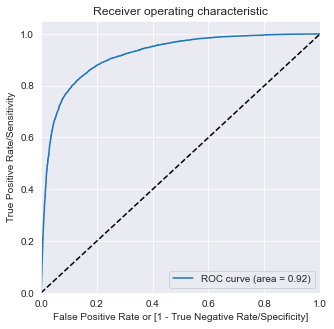

In [120]:
draw_roc(resultdf.Actual_Churn, resultdf.Churn_Prob)

__The ROC Curve looks good as area under the curve is 0.92__

### Finding Optimal Cutoff

#### 1) Precision-Recall Trade-off

In [121]:
precision, recall, threshold = precision_recall_curve(resultdf.Actual_Churn, resultdf.Churn_Prob)

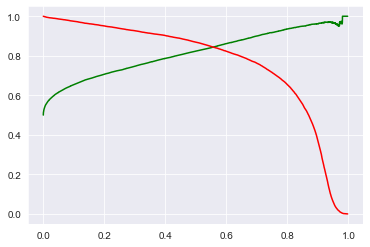

In [122]:
plt.plot(threshold, precision[:-1],"g-")
plt.plot(threshold, recall[:-1],"r-")

__From the above precision-recall trade-off we can see 0.56 looks as optimal cutoff__

In [123]:
resultdf['Churn_Predicted'] = resultdf.Churn_Prob.apply(lambda x: 1 if x>0.56 else 0)
resultdf.head()

,Actual_Churn,Churn_Prob,Churn_Predicted
0,1,0.887828,1
1,0,0.935420,1
2,0,0.165167,0
3,0,0.847811,1
4,1,0.940093,1


In [124]:
print(classification_report(resultdf.Actual_Churn,resultdf.Churn_Predicted))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     16700
           1       0.85      0.84      0.84     16701

    accuracy                           0.84     33401
   macro avg       0.84      0.84      0.84     33401
weighted avg       0.84      0.84      0.84     33401



__Inference:__ On the basis of Precision-Recall we could see the predicition is very good and consistent with accuracy of 85% & precision-recall for both classes are quite consistent making it a good model

#### 2) Finding Optimal Cutoff using Sensitivity/Specificty/Accuracy

In [125]:
nums = [i/10 for i in range(0,11)]
nums

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [126]:
resultdf1 = pd.DataFrame({'Actual_Churn': y_train.values, 'Churn_Prob': y_train_pred})
resultdf1.reset_index(drop=True, inplace=True)
resultdf1.head()

,Actual_Churn,Churn_Prob
0,1,0.887828
1,0,0.935420
2,0,0.165167
3,0,0.847811
4,1,0.940093


In [127]:
#  calculating predicted values for all cutoffs
for i in nums:
    resultdf1[i] = resultdf1.Churn_Prob.apply(lambda x: 1 if x > i else 0)

In [128]:
resultdf1.head()

,Actual_Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
0,1,0.887828,1,1,1,1,1,1,1,1,1,0,0
1,0,0.935420,1,1,1,1,1,1,1,1,1,1,0
2,0,0.165167,1,1,0,0,0,0,0,0,0,0,0
3,0,0.847811,1,1,1,1,1,1,1,1,1,0,0
4,1,0.940093,1,1,1,1,1,1,1,1,1,1,0


In [129]:
#Now let's calculate sensitivity/Specificity/accuracy
cutoff_df = pd.DataFrame(columns=['cutoff','accuracy','sensitivity','specificity'])

num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(resultdf1.Actual_Churn,resultdf1[i])
    total = sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
    
    
print(cutoff_df)    

     cutoff  accuracy  sensitivity  specificity
0.0     0.0  0.500015     1.000000     0.000000
0.1     0.1  0.729559     0.974672     0.484431
0.2     0.2  0.777911     0.950961     0.604850
0.3     0.3  0.806293     0.926711     0.685868
0.4     0.4  0.828658     0.902102     0.755210
0.5     0.5  0.841442     0.868750     0.814132
0.6     0.6  0.845214     0.822705     0.867725
0.7     0.7  0.838807     0.762350     0.915269
0.8     0.8  0.804557     0.654152     0.954970
0.9     0.9  0.679351     0.373271     0.985449


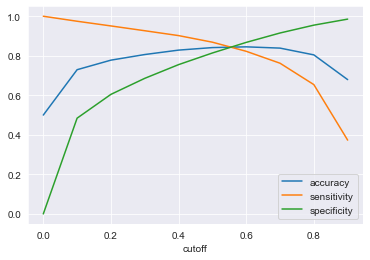

In [130]:
# Let's plot accuracy sensitivity and specificity for various cutoff probabailities.
cutoff_df.plot(x='cutoff', y=['accuracy','sensitivity','specificity'])
plt.legend(loc='lower right')
plt.show()

__From the above accuracy-sensitivity-specificity trade-off we can see 0.56 looks as optimal cutoff__

In [131]:
resultdf1['Churn_Predicted'] = resultdf1.Churn_Prob.apply(lambda x: 1 if x > 0.56 else 0)
resultdf1.head()

,Actual_Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,Churn_Predicted
0,1,0.887828,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.935420,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.165167,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0.847811,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.940093,1,1,1,1,1,1,1,1,1,1,0,1


In [132]:
confusion_mat = confusion_matrix(resultdf1.Actual_Churn, resultdf1.Churn_Predicted)
confusion_mat

array([[14123,  2577],
       [ 2630, 14071]], dtype=int64)

In [133]:
def scores(confusion):
    TP = confusion[1,1] #true positive
    TN = confusion[0,0] #true negative
    FP = confusion[0,1] #false positive
    FN = confusion[1,0] #false negative
    print('Accuracy: ',(round((TP+TN)/(TP+TN+FP+FN),3)))
    print('Sensitivity: ',(round((TP)/(TP+FN),3)))
    print('Specificity: ',(round((TN)/(TN+FP),3)))
    print('False Positive Rate - predicting churn when customer does not have churn: ',(round((FP)/(TN+FP),3)))
    print('Positive Predicted Value/Precision: ',(round((TP)/(TP+FP),3)))
    print('Negative Predicted Value: ',(round((TN)/(TN+FN),3)))
    
    

In [134]:
scores(confusion_mat)

Accuracy:  0.844
Sensitivity:  0.843
Specificity:  0.846
False Positive Rate - predicting churn when customer does not have churn:  0.154
Positive Predicted Value/Precision:  0.845
Negative Predicted Value:  0.843


### So from both Precision/Recall trade-off and Sentivity/Specificity/Accuracy trade-off we got 0.56 as optimal cutoff

### Making prediction on Test Set

In [135]:
X_test_sm = sm.add_constant(X_test[rfe_cols])
y_test_pred = model7.predict(X_test_sm)
y_test_pred

40927    0.321124
22771    0.359852
18767    0.210758
28341    0.920960
31282    0.916575
           ...   
28064    0.474656
22280    0.244637
41024    0.915844
33562    0.553348
7234     0.178048
Length: 14315, dtype: float64

In [136]:
test_resultdf = pd.DataFrame({'Actual_Churn': y_test.values, 'Churn_Prob': y_test_pred})
test_resultdf.reset_index(drop=True, inplace=True)
test_resultdf.head()

,Actual_Churn,Churn_Prob
0,1,0.321124
1,0,0.359852
2,0,0.210758
3,1,0.920960
4,1,0.916575


In [137]:
test_resultdf['Churn_Predicted'] = test_resultdf.Churn_Prob.map(lambda x: 1 if x > 0.56 else 0)
test_resultdf.head()

,Actual_Churn,Churn_Prob,Churn_Predicted
0,1,0.321124,0
1,0,0.359852,0
2,0,0.210758,0
3,1,0.920960,1
4,1,0.916575,1


In [138]:
print('Accuracy:',round((metrics.accuracy_score(test_resultdf.Actual_Churn, test_resultdf.Churn_Predicted)),6))

Accuracy: 0.83898


In [139]:
print(classification_report(test_resultdf.Actual_Churn,test_resultdf.Churn_Predicted))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7158
           1       0.84      0.84      0.84      7157

    accuracy                           0.84     14315
   macro avg       0.84      0.84      0.84     14315
weighted avg       0.84      0.84      0.84     14315



In [140]:
confusion1 = metrics.confusion_matrix(test_resultdf.Actual_Churn,test_resultdf.Churn_Predicted)
confusion1

array([[6012, 1146],
       [1159, 5998]], dtype=int64)

In [141]:
scores(confusion1)

Accuracy:  0.839
Sensitivity:  0.838
Specificity:  0.84
False Positive Rate - predicting churn when customer does not have churn:  0.16
Positive Predicted Value/Precision:  0.84
Negative Predicted Value:  0.838


__Inference:__ From the Logistic regression model we can determine that it performs very well with a accuracy of approximately 84% on both train & test showing sheer consistency, also we want to predict right people who are going to churn which means we want to reduce the count of False Negatives or in other words, Reduce Sensitivity , Our model is consistently performing well interms of Sensitivity & Accuracy.

### Model Type -2 : Decision Trees with Hyperparameter

In [142]:
dt = DecisionTreeClassifier(class_weight='balanced',
                            max_features='auto',
                            min_samples_leaf=100,
                            max_depth=6,
                            random_state=10)

In [143]:
X_train1, X_test1, y_train1,y_test1 = train_test_split(X_smote,y_smote,train_size=0.7, test_size=0.3, random_state=100, stratify=y_smote)

In [144]:
X_test1.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,aon_Years,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
40927,0.0,0.0,0.0,608.994827,664.751821,501.735443,795.345173,732.167183,543.117236,180.894808,146.387590,139.398849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,793.103569,732.152712,542.671450,158.173752,134.785557,120.152733,21.986303,11.592234,18.727021,0.000000,0.000000,0.0,973.283423,878.550302,681.561204,2.241403,0.014270,0.445785,0.720130,0.000000,0.509096,0.0,0.0,0.0,0.0,0.0,0.0,2.961533,0.014270,0.954881,0.0,0.0,0.0,0.837539,5.840213,3.305279,4.191062,0.0,0.0,981.283758,884.404986,685.831364,334.583832,454.218679,129.215892,169.789388,174.352680,171.899123,7.847636,29.846315,11.944367,512.240654,658.437674,313.069583,0.476654,0.284997,0.290625,0.092252,0.620341,0.013667,0.041403,1.04708,0.192544,0.0,0.0,0.0,0.610711,1.962217,0.497037,560.994126,697.775142,336.568927,0.29397,0.0,0.0,38.392540,33.277454,13.434449,9.44625,4.077998,9.557858,14,16,6,674,741,557,111,119,148,42,50,147,2.979901,1.0,0.020099,48.673104,23.200985,0.663251,121.849064,23.200985,0.663251,27.053178,1.79322,0.00,107.188887,43.52192,0.0,0,0,0,1,0,0,0,0,0,0,0,0,340,0.0,2.714327,89.361637,0.956276,1485.524077,1536.987976,994.630787,0.000000,0.00000,0.000000
22771,0.0,0.0,0.0,543.561000,627.120000,526.087000,395.990000,536.310000,484.160000,551.140000,448.810000,373.630000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,4.730000,21.230000,4.890000,34.010000,75.180000,94.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,38.740000,96.410000,99.340000,391.260000,515.080000,479.260000,517.130000,373.630000,279.180000,0.0,0.0,0.0,0.0,0.0,0.0,908.390000,888.710000,758.440000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,947.140000,985.130000,857.790000,0.730000,12.940000,6.060000,62.690000,46.130000,90.440000,0.000000,0.000000,0.000000,63.430000,59.080000,96.510000,0.030000,3

In [145]:
dt.fit(X_train1,y_train1)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='auto', min_samples_leaf=100,
                       random_state=10)

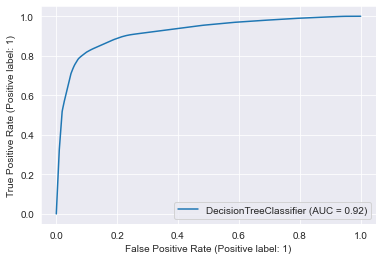

In [146]:
# Plotting ROC Curve
plot_roc_curve(dt, X_train1, y_train1)

__ROC Curve looks good with decent AUC Score of 0.92__

In [147]:
print('Scores on Train Set: \n')
scores(confusion_matrix(y_train1,dt.predict(X_train1)))

Scores on Train Set: 

Accuracy:  0.859
Sensitivity:  0.819
Specificity:  0.9
False Positive Rate - predicting churn when customer does not have churn:  0.1
Positive Predicted Value/Precision:  0.892
Negative Predicted Value:  0.832


In [148]:
print('Scores on Test Set: \n')
scores(confusion_matrix(y_test1,dt.predict(X_test1)))

Scores on Test Set: 

Accuracy:  0.859
Sensitivity:  0.82
Specificity:  0.898
False Positive Rate - predicting churn when customer does not have churn:  0.102
Positive Predicted Value/Precision:  0.889
Negative Predicted Value:  0.833


__Inference:__ The model accuracy comes out to be 86% and rest metrics look decent without hyperparameter tuning

In [149]:
# Hyperparameter tuning
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'max_features': [8,10,15]
}

In [150]:
dt1= DecisionTreeClassifier(class_weight='balanced', random_state=10)

In [151]:
grid_search = GridSearchCV(estimator=dt1,
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy'
                           )

In [152]:
%%time
grid_search.fit(X_train1, y_train1)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Wall time: 18 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy', verbose=1)

In [153]:
# Scores of grid search
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.322936,0.032179,0.024136,0.005254,5,8,50,50,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.810058,0.797006,0.808383,0.810030,0.812126,0.807521,0.005390,43
1,0.384970,0.083688,0.022141,0.006225,5,8,50,100,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.810058,0.797006,0.808383,0.810030,0.812126,0.807521,0.005390,43
2,0.422270,0.029143,0.026928,0.008004,5,8,100,50,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.814698,0.801198,0.802395,0.813473,0.815120,0.809377,0.006225,41
3,0.303189,0.042990,0.032912,0.013761,5,8,100,100,"{'max_depth': 5, 'max_features': 8, 'min_sampl...",0.814698,0.801198,0.802395,0.813473,0.815120,0.809377,0.006225,41
4,0.344278,0.063150,0.028923,0.009873,5,10,50,50,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.799581,0.798653,0.805689,0.795808,0.784880,0.796922,0.006829,47


In [154]:
# Top 5 fits of grid search
score_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
44,0.502456,0.009018,0.016356,0.001017,14,15,50,50,"{'max_depth': 14, 'max_features': 15, 'min_sam...",0.884448,0.877545,0.880090,0.882036,0.872156,0.879255,0.004213,1
45,0.525395,0.020040,0.020545,0.002646,14,15,50,100,"{'max_depth': 14, 'max_features': 15, 'min_sam...",0.884448,0.877545,0.880090,0.882036,0.872156,0.879255,0.004213,1
32,0.539757,0.048102,0.018749,0.002476,11,15,50,50,"{'max_depth': 11, 'max_features': 15, 'min_sam...",0.878611,0.869311,0.877844,0.873353,0.878593,0.875543,0.003678,3
33,0.488095,0.028480,0.021742,0.003806,11,15,50,100,"{'max_depth': 11, 'max_features': 15, 'min_sam...",0.878611,0.869311,0.877844,0.873353,0.878593,0.875543,0.003678,3
20,0.449797,0.058171,0.020545,0.006604,8,15,50,50,"{'max_depth': 8, 'max_features': 15, 'min_samp...",0.878162,0.874401,0.874251,0.872605,0.870359,0.873956,0.002559,5


In [155]:
print(f'We can get accuracy of {round((grid_search.best_score_),4)*100} with best decision tree parameters: {grid_search.best_params_}')

We can get accuracy of 87.92999999999999 with best decision tree parameters: {'max_depth': 14, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [156]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=14, max_features=15,
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=10)

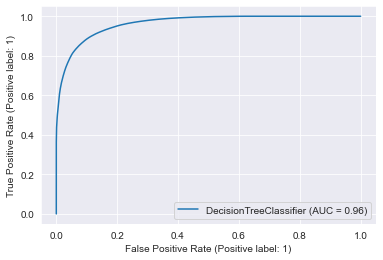

In [157]:
# Plotting ROC Curve
plot_roc_curve(dt_best, X_train1, y_train1)

__ROC Curve looks good with decent AUC Score of 0.96__

### Model Summary:

In [158]:
print('Scores on Train Set: \n')
scores(confusion_matrix(y_train1,dt_best.predict(X_train1)))

Scores on Train Set: 

Accuracy:  0.893
Sensitivity:  0.889
Specificity:  0.896
False Positive Rate - predicting churn when customer does not have churn:  0.104
Positive Predicted Value/Precision:  0.895
Negative Predicted Value:  0.89


In [159]:
print('Scores on Test Set: \n')
scores(confusion_matrix(y_test1,dt_best.predict(X_test1)))

Scores on Test Set: 

Accuracy:  0.882
Sensitivity:  0.879
Specificity:  0.885
False Positive Rate - predicting churn when customer does not have churn:  0.115
Positive Predicted Value/Precision:  0.884
Negative Predicted Value:  0.88


__Inference:__ From the above Decision Tree model , we can infer that the model is good but it is slightly underperforming on the test set. With Hyper parameter tuning the performance is enhanced. The model looks to be overfitting with such high scores.

### Model Type -3 : Random Forest

In [160]:
rf = RandomForestClassifier(oob_score=True)

In [161]:
# Hyperparameter tuning

param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

In [162]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1,scoring='accuracy')

In [163]:
%%time
grid_search.fit(X_train1, y_train1)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Wall time: 3min 50s


GridSearchCV(cv=3, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [164]:
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.463369,0.327328,0.188163,0.008197,5,10,50,50,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.887462,0.882253,0.882242,0.883985,0.002458,19
1,17.160449,0.386139,0.346075,0.029349,5,10,50,50,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.887192,0.888989,0.883769,0.886650,0.002165,13
2,25.672688,0.394633,0.487364,0.032208,5,10,50,50,300,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.886384,0.885666,0.882781,0.884943,0.001557,14
3,8.523543,0.261162,0.178523,0.008580,5,10,50,100,100,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.886384,0.884767,0.883230,0.884794,0.001288,16
4,17.784780,0.571275,0.341753,0.015067,5,10,50,100,200,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.886384,0.884408,0.882961,0.884584,0.001403,17


In [165]:
scores_df.nlargest(5,'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
15,14.716318,0.565226,0.164228,0.001243,5,20,50,100,100,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.892671,0.894916,0.889158,0.892249,0.002370,1
17,44.057864,0.889018,0.445143,0.011866,5,20,50,100,300,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.891324,0.894108,0.888799,0.891410,0.002168,2
14,45.118694,1.957850,0.469744,0.028814,5,20,50,50,300,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.890156,0.893479,0.889877,0.891171,0.001636,3
12,14.198369,0.140390,0.167220,0.011697,5,20,50,50,100,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.889348,0.893929,0.889877,0.891051,0.002046,4
16,29.289020,0.596748,0.307511,0.023829,5,20,50,100,200,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.890605,0.892042,0.889787,0.890812,0.000932,5


In [166]:
print(f'We can get accuracy of {round((grid_search.best_score_),4)*100} with best Random Forest parameters: {grid_search.best_params_}')

We can get accuracy of 89.22 with best Random Forest parameters: {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [167]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, oob_score=True)

In [168]:
# out of bag score
rf_best.oob_score_

0.8911709230262567

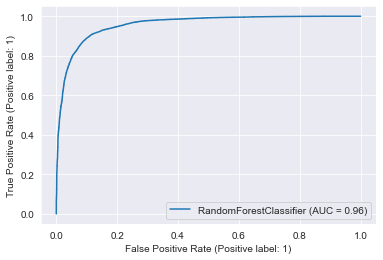

In [169]:
# plotting ROC Curve
plot_roc_curve(rf_best, X_train1,y_train1)

__ROC Curve looks good with decent AUC Score of 0.96__

In [170]:
# Checking Feature Importance
imp_df = pd.DataFrame({'Features': X_train1.columns,'Importance %': ((rf_best.feature_importances_)*100)})
imp_df = imp_df.sort_values(by='Importance %', ascending=False)

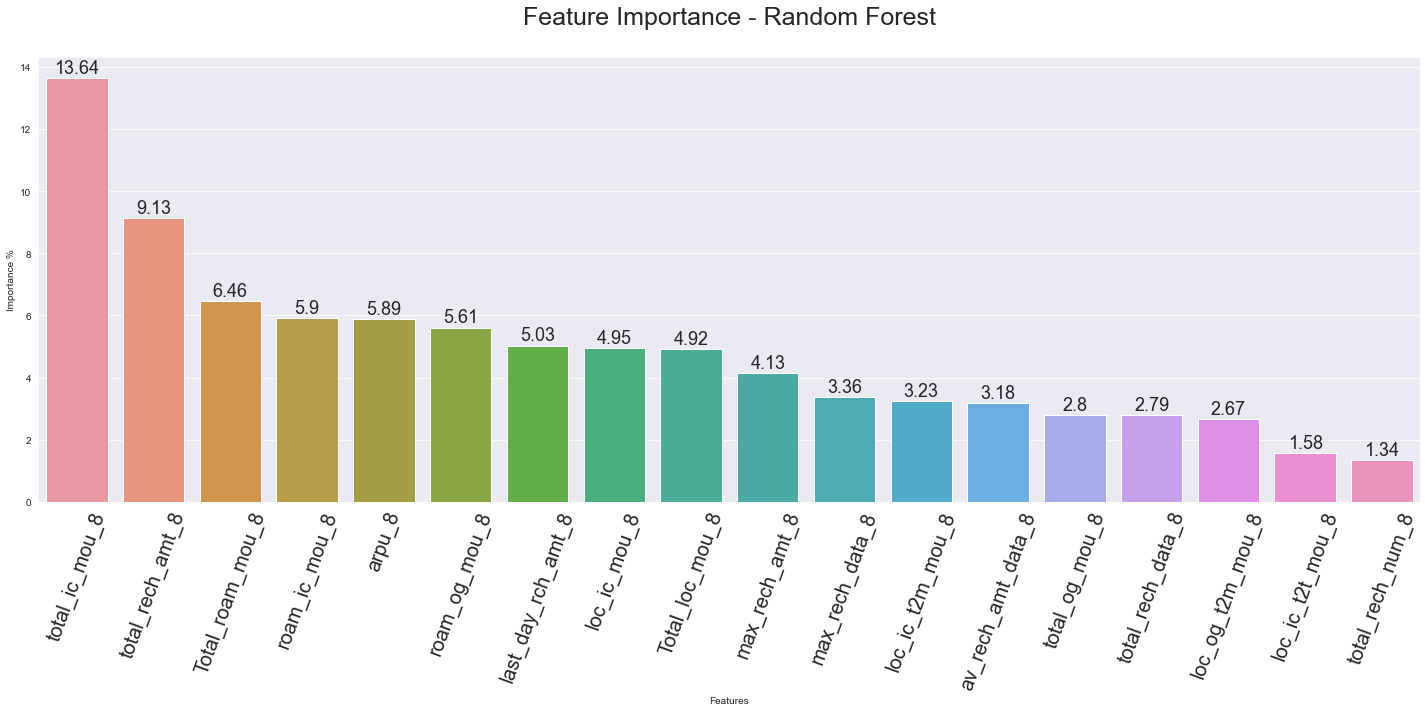

In [171]:
xdf = imp_df[imp_df['Importance %']>=1]

plt.figure(figsize=(20,10))
gplot1=sns.barplot(x=xdf['Features'], y=xdf['Importance %'])
for p in gplot1.patches:
        gplot1.annotate(round((p.get_height()),2),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=18,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
plt.title('Feature Importance - Random Forest\n', fontdict={'size':25})
plt.xticks(rotation=70, size=20)
plt.tight_layout()
plt.show()

### Model Summary:

In [172]:
print('Scores on Train Set: \n')
scores(confusion_matrix(y_train1, rf_best.predict(X_train1)))

Scores on Train Set: 

Accuracy:  0.895
Sensitivity:  0.889
Specificity:  0.9
False Positive Rate - predicting churn when customer does not have churn:  0.1
Positive Predicted Value/Precision:  0.899
Negative Predicted Value:  0.891


In [173]:
print('Scores on Test Set: \n')
scores(confusion_matrix(y_test1, rf_best.predict(X_test1)))

Scores on Test Set: 

Accuracy:  0.892
Sensitivity:  0.887
Specificity:  0.897
False Positive Rate - predicting churn when customer does not have churn:  0.103
Positive Predicted Value/Precision:  0.896
Negative Predicted Value:  0.888


__Inference:__ From the above Random Forest model , we can infer that the model is good but it is slightly underperforming on the test set. With Hyper parameter tuning the performance is enhanced. The Random Forest ofcourse performs better than decision tree here. Although the model looks to overfit here with such high scores

## Step-5: Reporting Final Model

#### Inference:
After trying out various models like Logistic Regression, Decision Trees & Random Forest, we have came to a conclusion that Logistic Regression is turning out to be a optimal model with Consistent Accuracy, AUC_Score & Recall/Sensitivity. Although Scores for other models like decision tree & random forest looks good they tend to overfit the model. Thus, We can agree to report Logistic Regression as our Final Optimal Model.

In [174]:
print(model7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                33401
Model:                            GLM   Df Residuals:                    33381
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12357.
Date:                Mon, 06 Jun 2022   Deviance:                       24715.
Time:                        11:08:57   Pearson chi2:                 1.47e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4760
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0124      0

### Determining the impact of each feature on Possibility of Customer Churning

In [175]:
Summary_DataFrame = pd.DataFrame(model7.params)
Summary_DataFrame.reset_index(inplace=True)
Summary_DataFrame.columns=['Features','Coefficients']
Summary_DataFrame = Summary_DataFrame.iloc[1:]
Summary_DataFrame['Impact %'] = Summary_DataFrame['Coefficients'].apply(lambda x: round((x/sum(Summary_DataFrame['Coefficients'])*100),2))
Summary_DataFrame = Summary_DataFrame.sort_values(by='Impact %', ascending=False)
Summary_DataFrame

,Features,Coefficients,Impact %
5,total_ic_mou_8,-18.436301,20.84
12,monthly_2g_8,-10.743343,12.14
14,sachet_2g_8,-10.685383,12.08
6,spl_ic_mou_8,-7.790115,8.81
17,monthly_3g_8,-7.552407,8.54
7,total_rech_num_8,-6.455513,7.30
10,monthly_2g_6,-5.417876,6.12
4,loc_og_t2m_mou_8,-5.039237,5.70
8,last_day_rch_amt_8,-4.902196,5.54
11,monthly_2g_7,-4.840843,5.47


From the above you can see that the coefficients are negatively correlated, which means every decrease in __total_ic_mou_8__ will lead to increase in chances(by 20.84%) of customer churning.

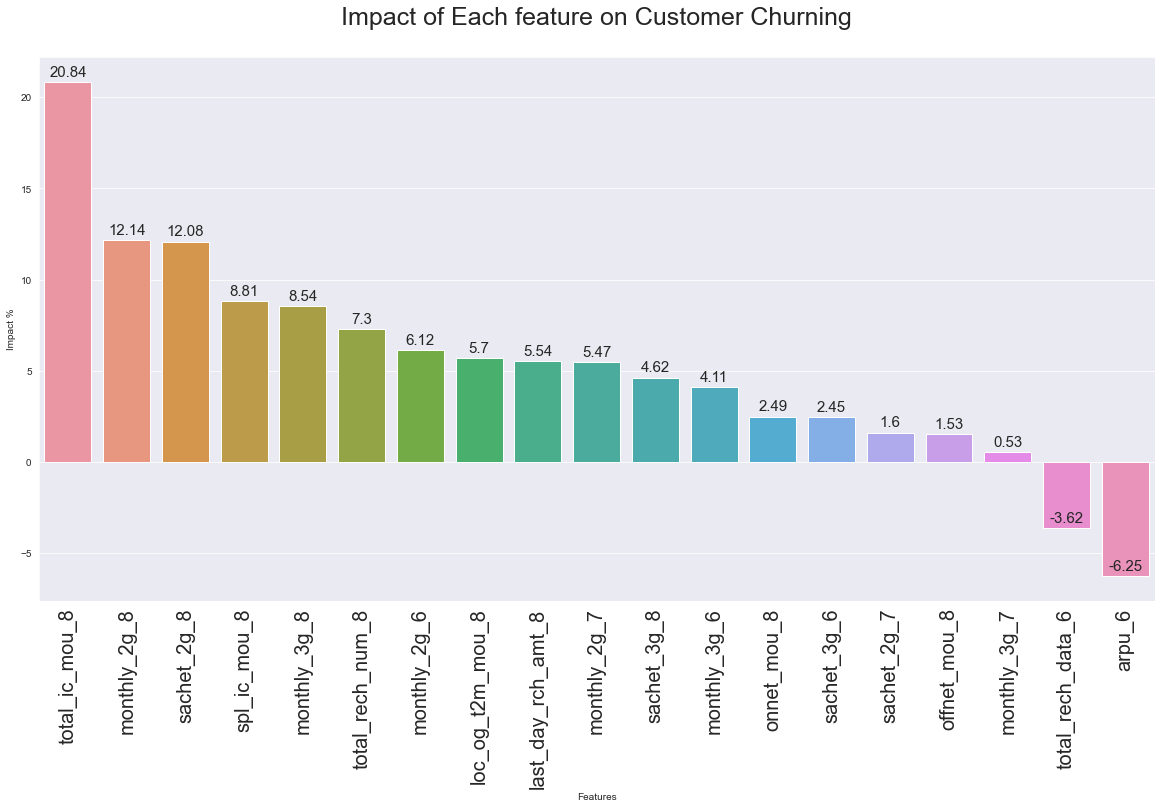

In [176]:
plt.figure(figsize=(20,10))
gplot = sns.barplot(x=Summary_DataFrame.Features,y=Summary_DataFrame['Impact %'])
for p in gplot.patches:
        gplot.annotate(p.get_height(),#text that you want to write on top
        (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
        ha = 'center', va = 'center',size=15,# alignment of the text
        xytext = (0, 10),# distance of text from top of the patch
        textcoords = 'offset points'), #do not change and remove it
           
plt.xticks(size =20,rotation=90)
plt.title('Impact of Each feature on Customer Churning\n', fontdict={'size':25})
plt.show()

### Conclusion & Recommentdations:
1. The Company should focus on retaining customers whose __Incoming Minutes of Usage in August__ is declining as it has __21% chance of customer getting churned.__
2. The Company should focus on retaining Customers whose __2g Data recharge(Monthly/Sachet) in the July & August__ month is declining significantly as it has total __30% chances of customer being churned.__
3. The Company can ignore retaining customers whose __Average revenue per user & total data recharges__ are increasing in June & August as it has __10% chance of customer not churning.__
4. Customers whose __total number of times recharged & whose monthly 3g data recharge__ is declining in August are more likely to churn with __churn with possibility of 16%.__
5. Customers whose __Special incoming minutes of usage & whose local outgoing calls to other mobile operator in August__ is declining are more likely to churn with __churning rate of 16%.__
6. Company should retain customers whose Minutes of usage of calls with same operator network __(ONNET)__ & other operator network __(OFFNET)__ is declining in August as it has churn probability of __4.3% chance of customer churning.__